# Importing Libraries and Dataset

In [ ]:
!pip install kaggle
import os

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#uploading kaggle json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"bhargavipoyekar","key":"310e6eb464fea6dfb3261c84911e4298"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d  bhargavipoyekar/behavioral-data
!kaggle datasets download -d  bhargavipoyekar/pupil-data
!kaggle datasets download -d  bhargavipoyekar/test-data

behavioral-data.zip: Skipping, found more recently modified local copy (use --force to force download)
pupil-data.zip: Skipping, found more recently modified local copy (use --force to force download)
test-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip behavioral-data.zip
!unzip pupil-data.zip
!unzip test-data.zip

Archive:  behavioral-data.zip
replace Behavioral Data/subject_01_behave.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Behavioral Data/subject_01_behave.csv  
  inflating: Behavioral Data/subject_02_behave.csv  
  inflating: Behavioral Data/subject_03_behave.csv  
  inflating: Behavioral Data/subject_04_behave.csv  
  inflating: Behavioral Data/subject_05_behave.csv  
  inflating: Behavioral Data/subject_06_behave.csv  
  inflating: Behavioral Data/subject_07_behave.csv  
  inflating: Behavioral Data/subject_08_behave.csv  
  inflating: Behavioral Data/subject_09_behave.csv  
  inflating: Behavioral Data/subject_10_behave.csv  
  inflating: Behavioral Data/subject_11_behave.csv  
  inflating: Behavioral Data/subject_12_behave.csv  
  inflating: Behavioral Data/subject_13_behave.csv  
  inflating: Behavioral Data/subject_14_behave.csv  
  inflating: Behavioral Data/subject_15_behave.csv  
  inflating: Behavioral Data/subject_16_behave.csv  
  inflating: Behavioral Data/subjec

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
from scipy.interpolate import interp1d
import math
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import welch
from datetime import datetime
import seaborn as sns

In [ ]:
Behave_Path= Path('/content/Behavioral Data')
Pupil_Path=Path('/content/Pupil Data')
Test_Path=Path('/content/Test Data')

In [ ]:
# get list of names of csv files in the dataset
behavepaths = [
    filepath
    for filepath in Behave_Path.iterdir()
    if filepath.suffix == '.csv'
]
pupilpaths=[
    filepath
    for filepath in Pupil_Path.iterdir()
    if filepath.suffix == '.csv'
]
testpaths=[
    filepath
    for filepath in Test_Path.iterdir()
    if filepath.suffix == '.csv'
]

# Sort the csv file paths
behavepaths.sort()
pupilpaths.sort()


In [ ]:
behavepaths

[PosixPath('/content/Behavioral Data/subject_01_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_02_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_03_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_04_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_05_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_06_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_07_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_08_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_09_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_10_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_11_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_12_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_13_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_14_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_15_behave.csv'),
 PosixPath('/content/Behavioral Data/subject_16_behave.csv'),
 PosixPa

# Step 1

In [ ]:
pupil_sample=pd.read_csv(pupilpaths[23])
len(pupilpaths)

52

In [ ]:
pupil_sample.head()

Time  Pupil Diameter
0     4        5.885475
1     8        5.885475
2    12        5.885475
3    16        5.885475
4    20        5.885475

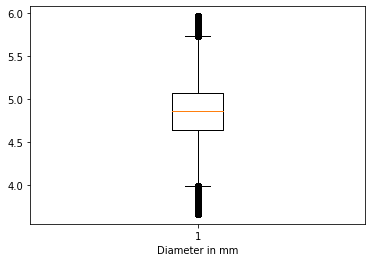

In [ ]:
plt.boxplot(pupil_sample['Pupil Diameter'])
plt.xlabel('Diameter in mm')
plt.show()

Text(0, 0.5, 'Pupil Diameter in mm')

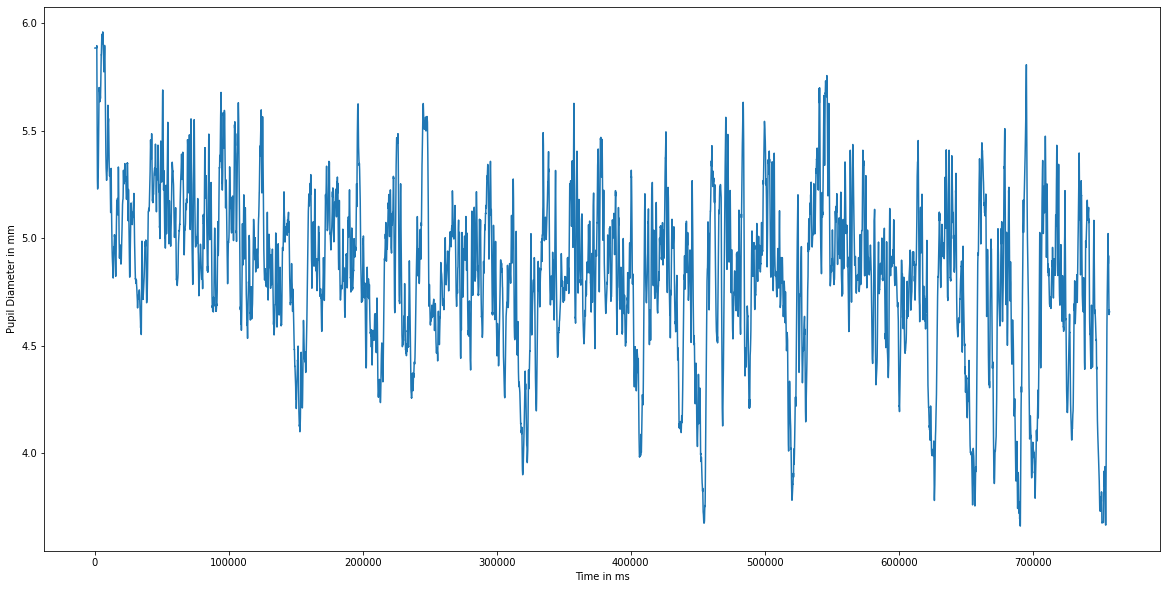

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(pupil_sample['Time'],pupil_sample['Pupil Diameter'])
plt.xlabel('Time in ms')
plt.ylabel('Pupil Diameter in mm')


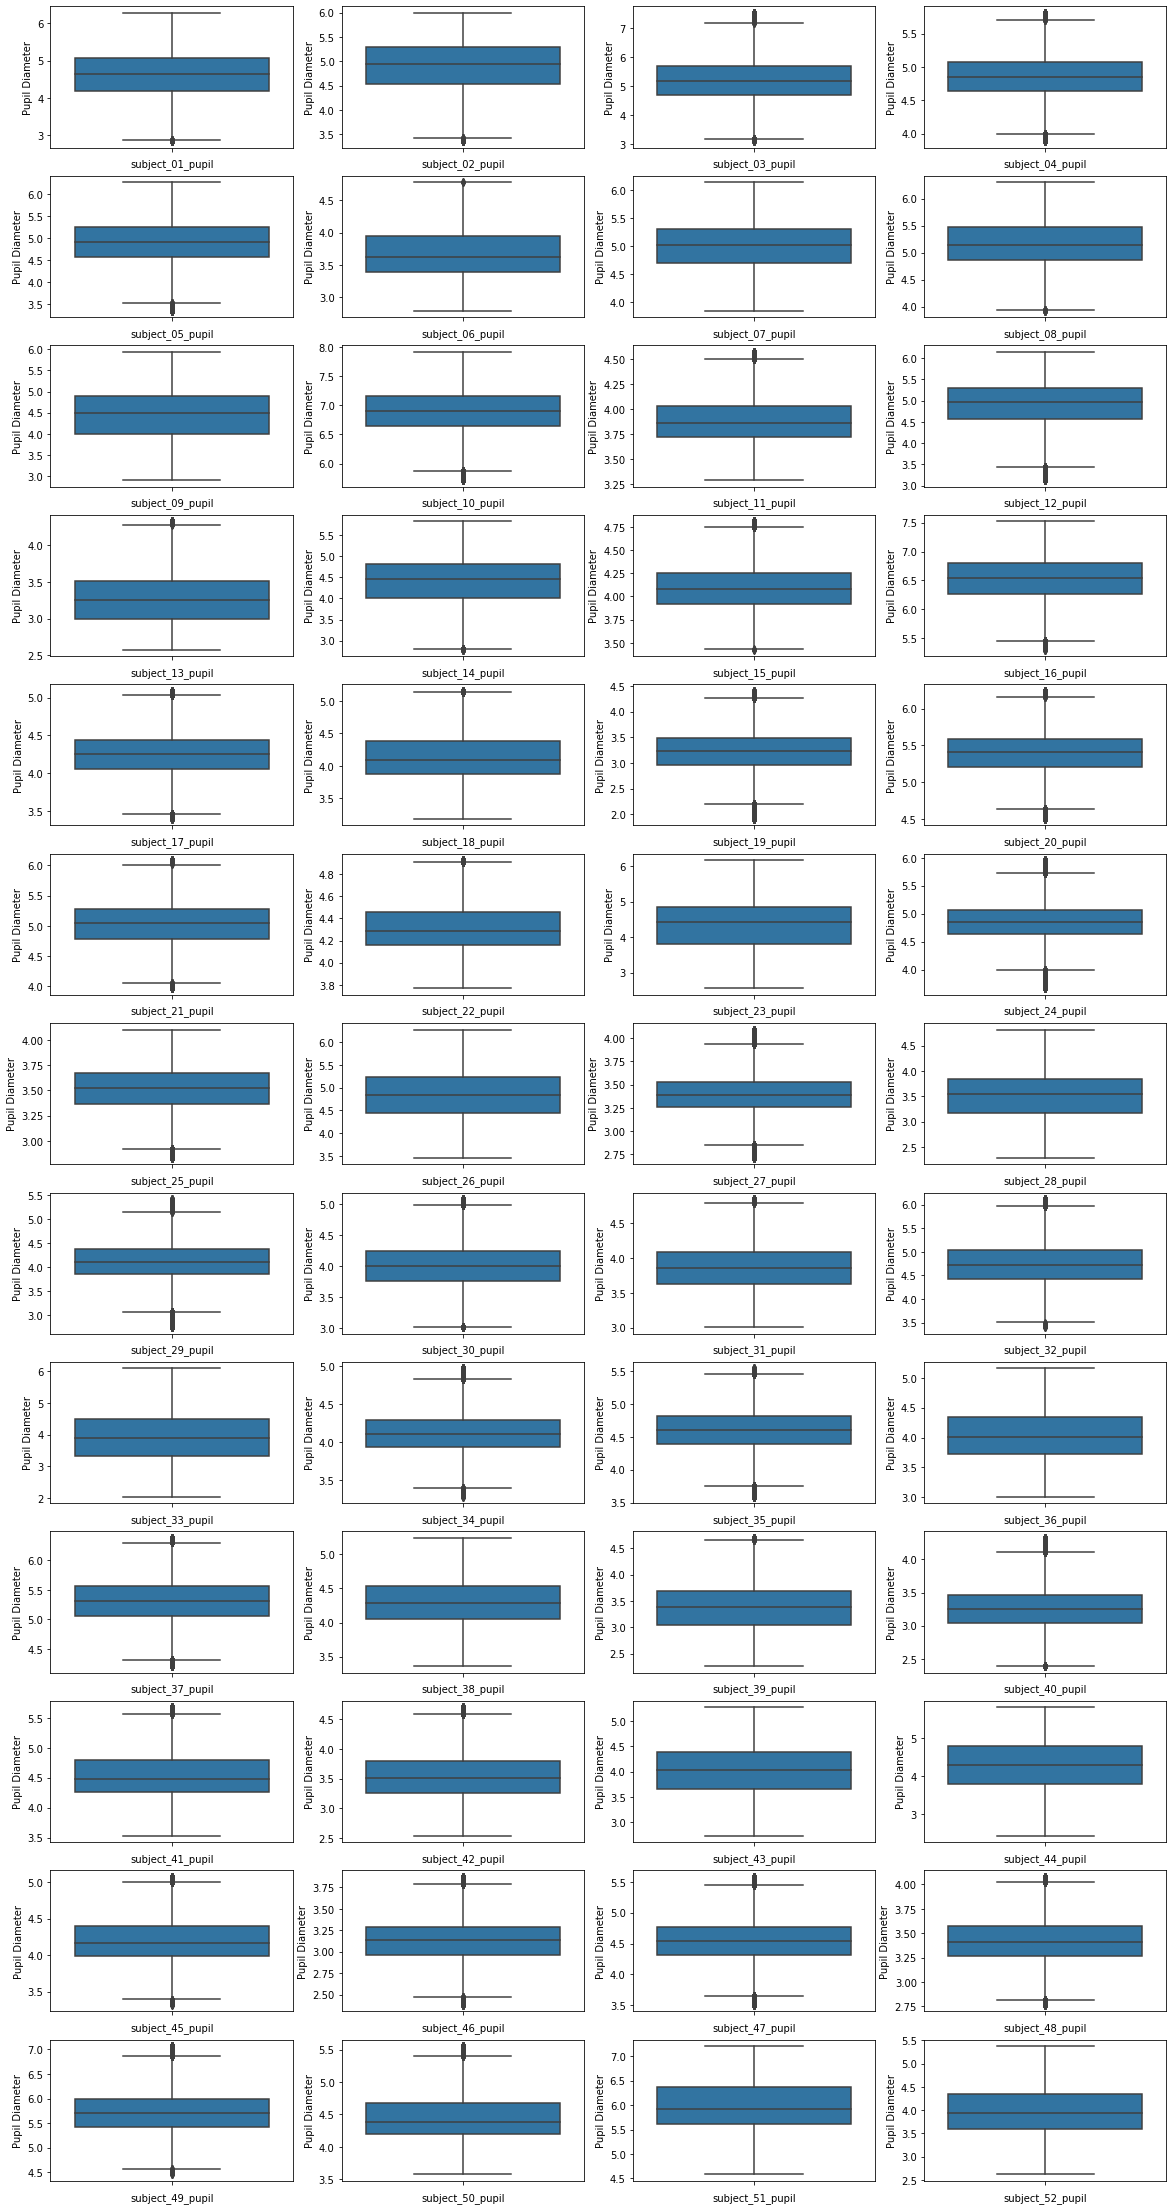

In [ ]:
count=0
f, axes = plt.subplots(13, 4, figsize=(20,40))
for i in range(13):
  for j in range(4):
    pupil_sample=pd.read_csv(pupilpaths[count])
    g = sns.boxplot(data=pupil_sample, y='Pupil Diameter', ax=axes[i,j]).set(xlabel=pupilpaths[count].stem)
    count+=1
    

# Step 2

In [ ]:
pupil_sample=pd.read_csv(pupilpaths[23])
behave_sample=pd.read_csv(behavepaths[23])

In [ ]:
behave_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        40 non-null     float64
 1   RT          38 non-null     float64
 2   Difficulty  40 non-null     int64  
 3   isCorrect   40 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.4 KB


<ipython-input-16-92c9721b4c20>:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-16-92c9721b4c20>:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


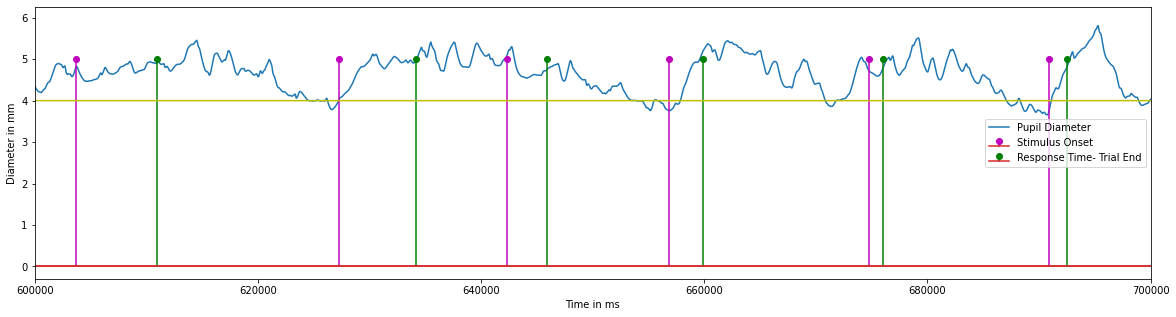

In [ ]:
plt_1=plt.figure(figsize=(20,5))
y_stimulus=[5]*len(behave_sample['Time'])
plt.plot(pupil_sample['Time'],pupil_sample['Pupil Diameter'], label='Pupil Diameter')
markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')

behave_sample['RT']=[8000 if math.isnan(i) else i for i in behave_sample['RT']]
markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')
plt.ylabel('Diameter in mm')
plt.xlabel('Time in ms')
plt.setp(markerline, 'color', 'm')
plt.setp(stemlines, 'color', 'm')
plt.setp(markerline2, 'color', 'g')
plt.setp(stemlines2, 'color', 'g')
plt.legend()
plt.xlim(600000,700000)
y=[4]*len(pupil_sample['Time'])
plt.plot(pupil_sample['Time'],y, color='y')
plt.show()


subject_01_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


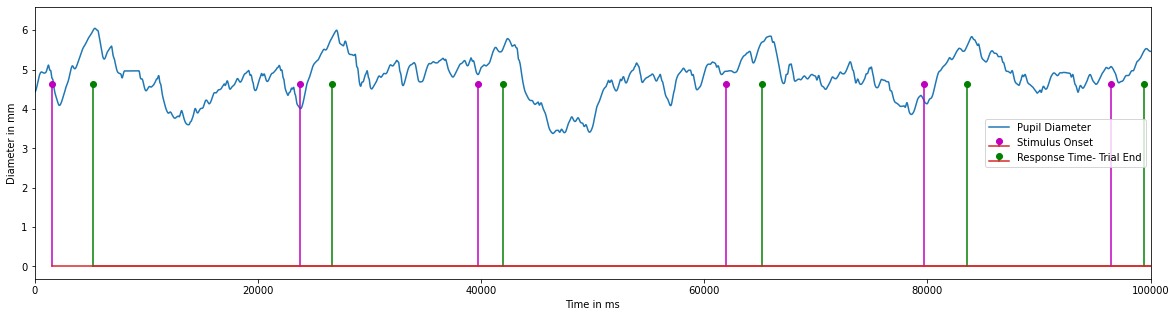

subject_02_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


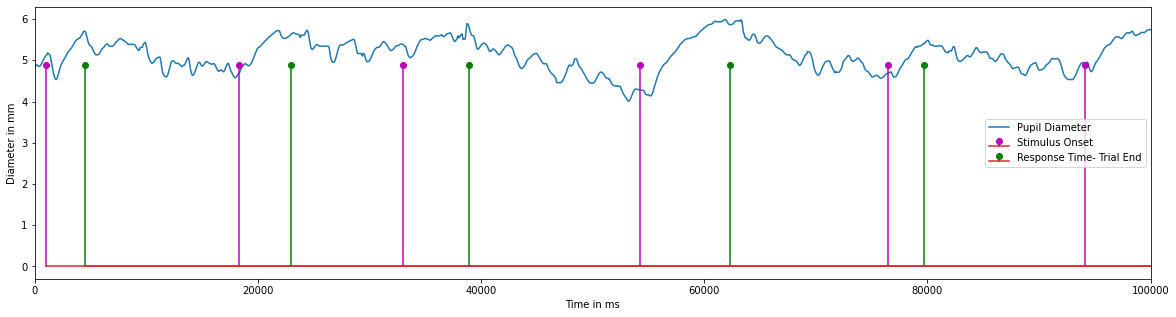

subject_03_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


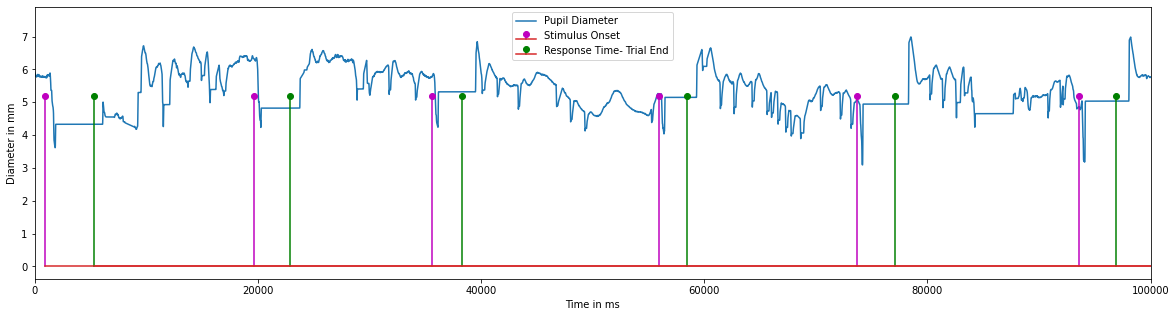

subject_04_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


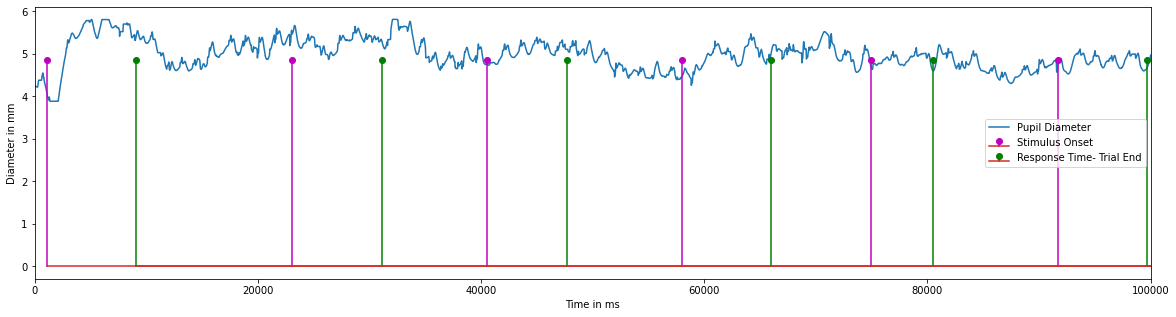

subject_05_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


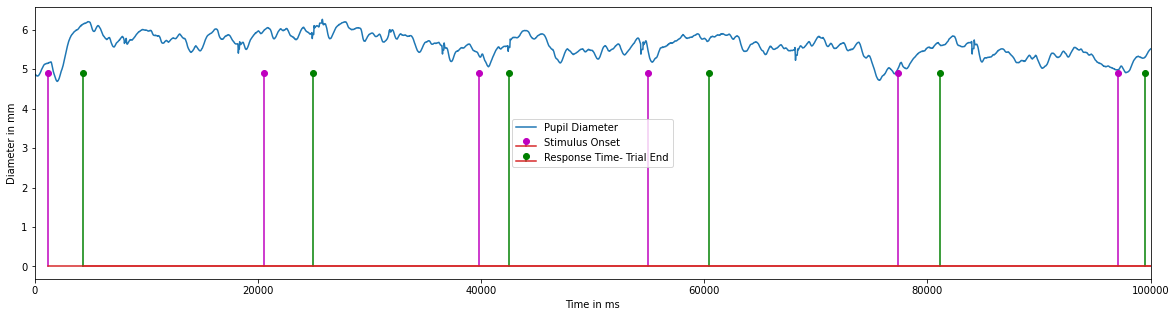

subject_06_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


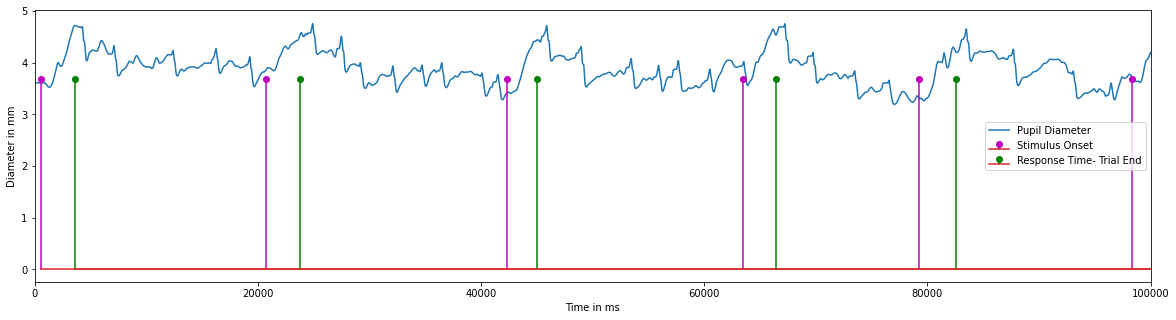

subject_07_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


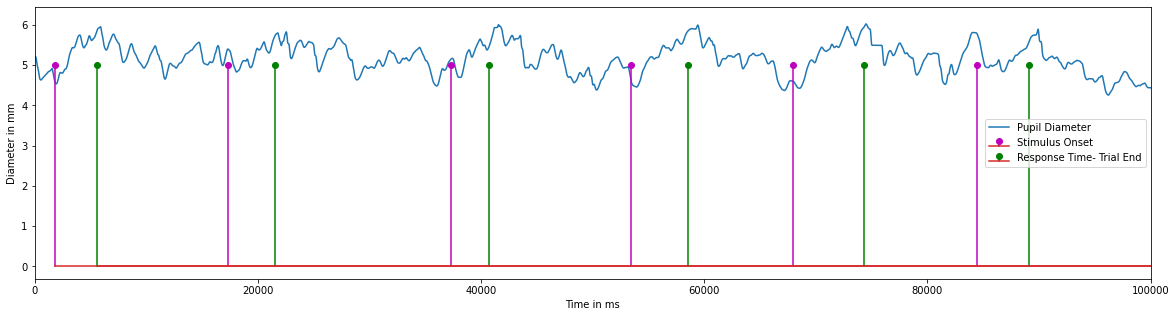

subject_08_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


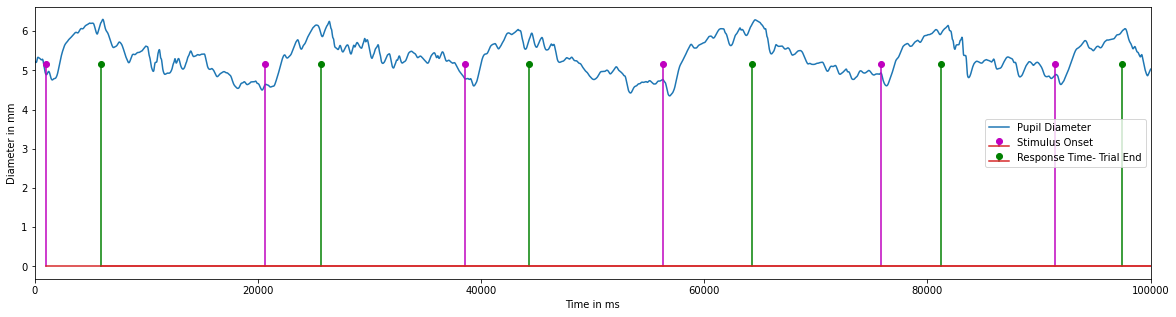

subject_09_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


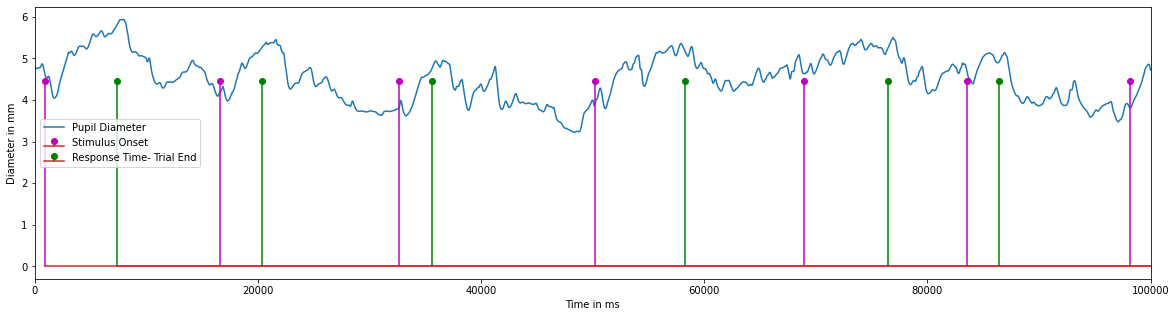

subject_10_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


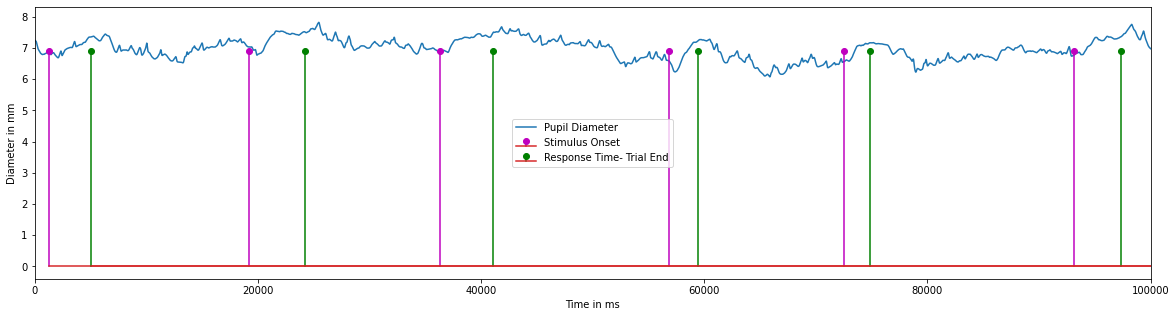

subject_11_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


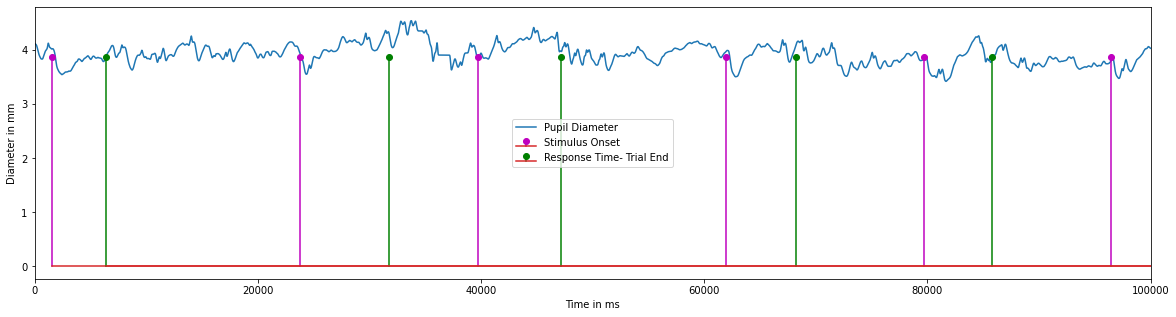

subject_12_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


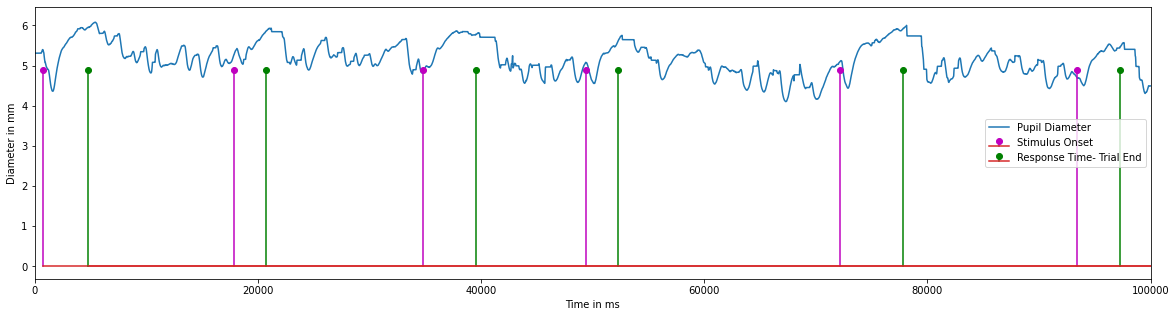

subject_13_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


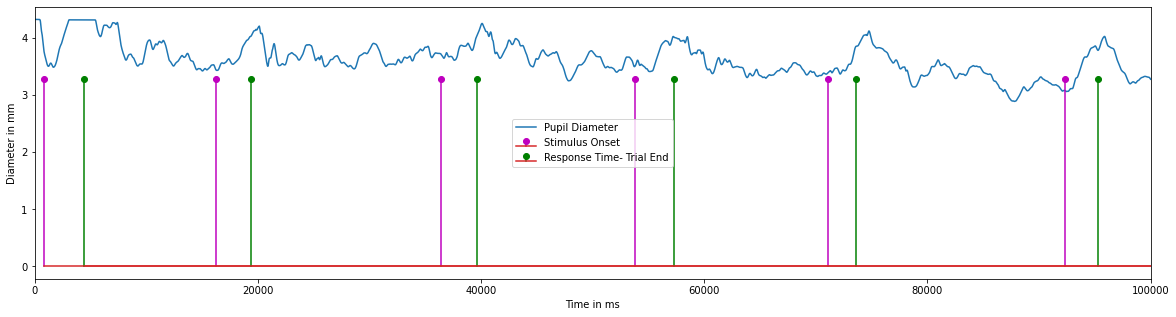

subject_14_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


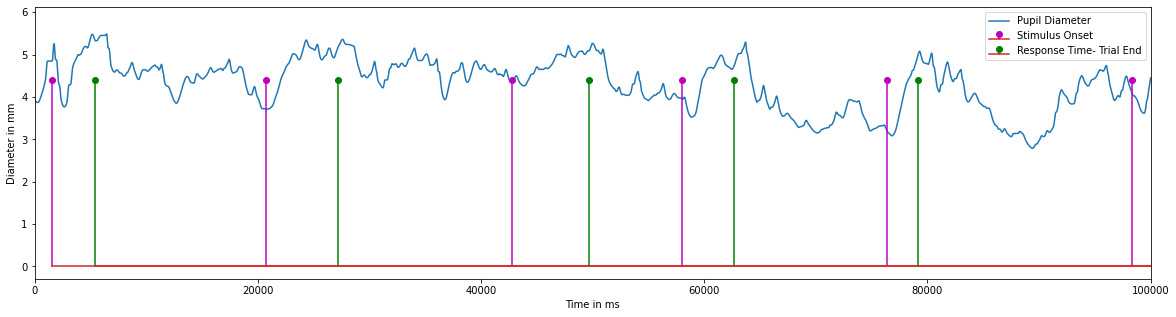

subject_15_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


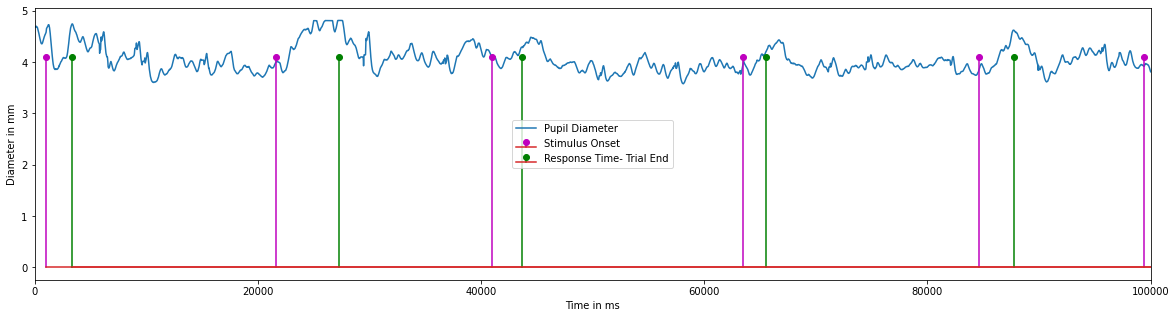

subject_16_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


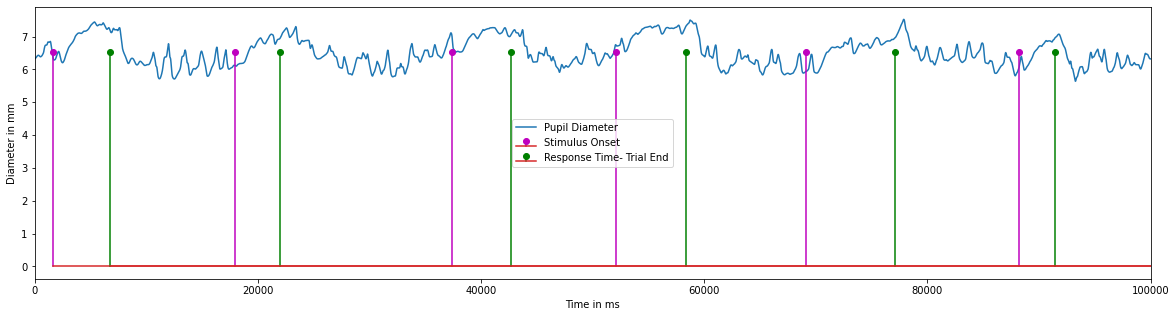

subject_17_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


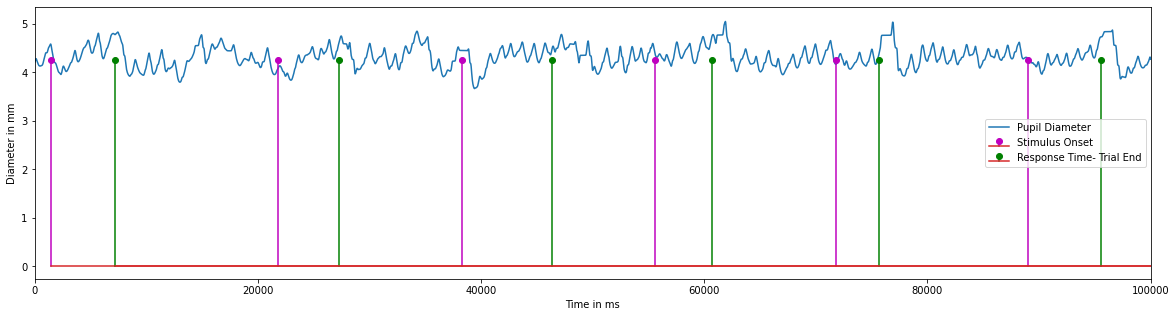

subject_18_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


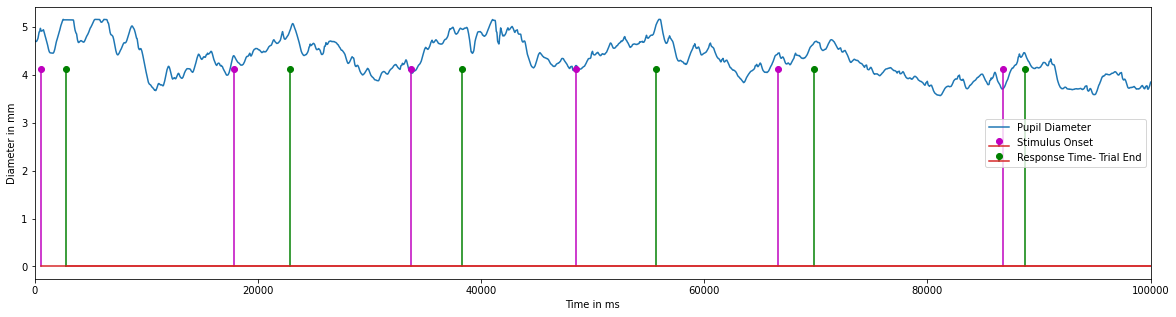

subject_19_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


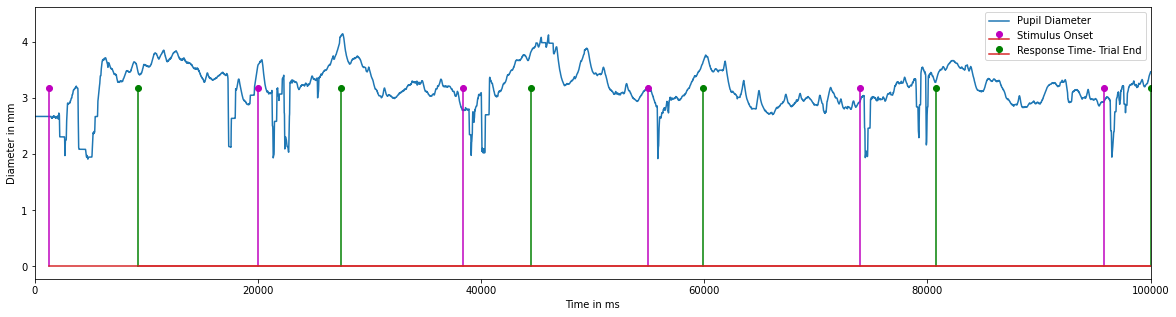

subject_20_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


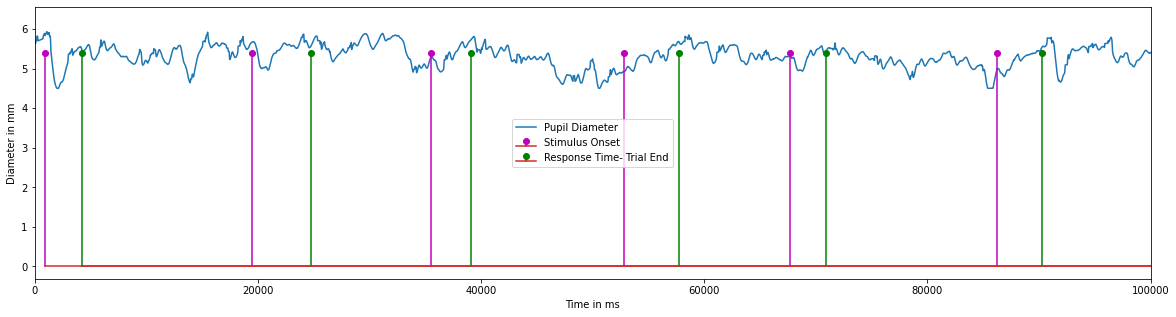

subject_21_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


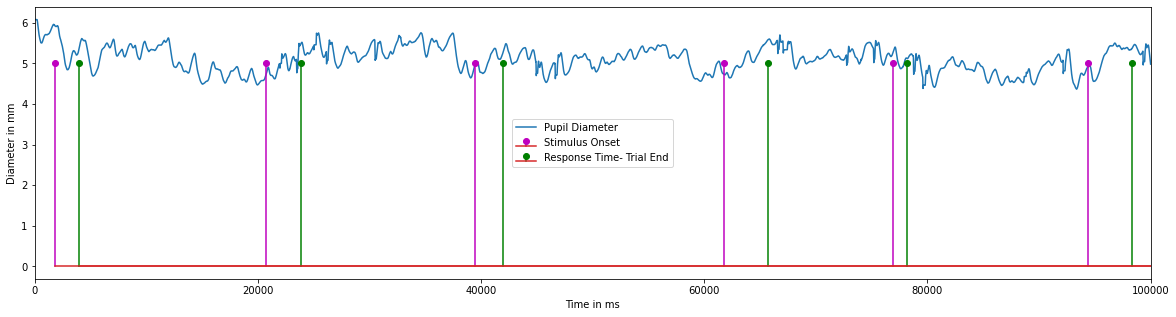

subject_22_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


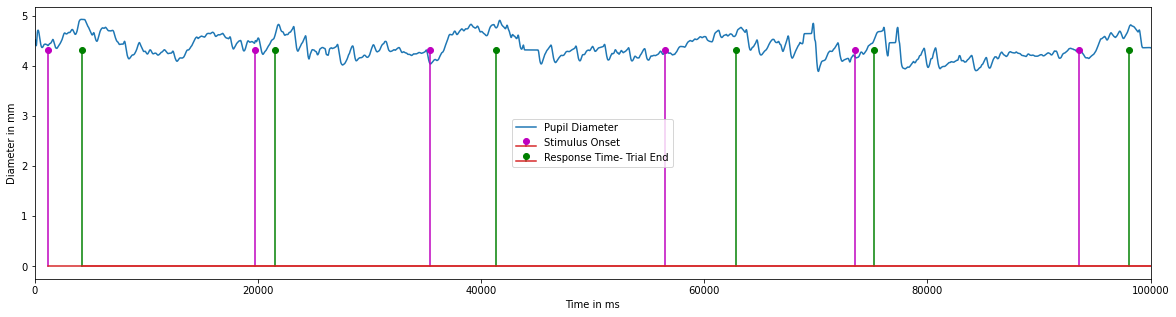

subject_23_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


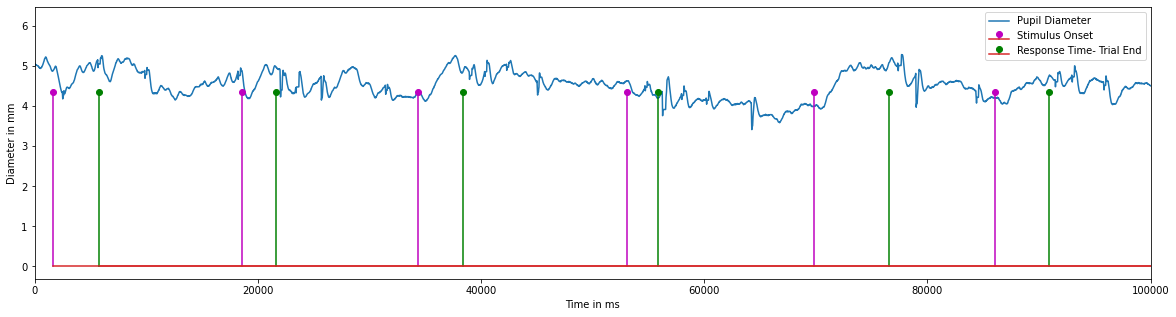

subject_24_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


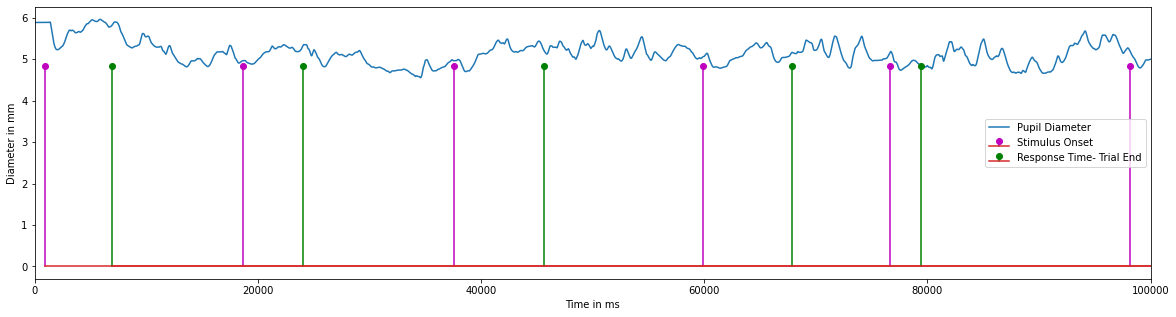

subject_25_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


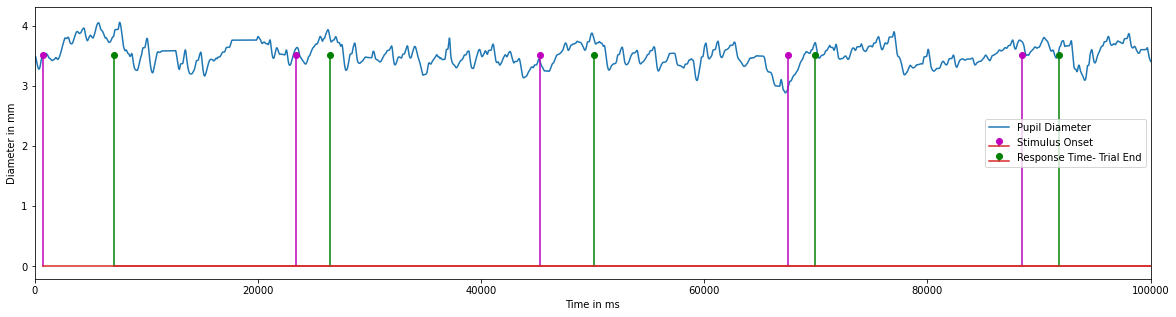

subject_26_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


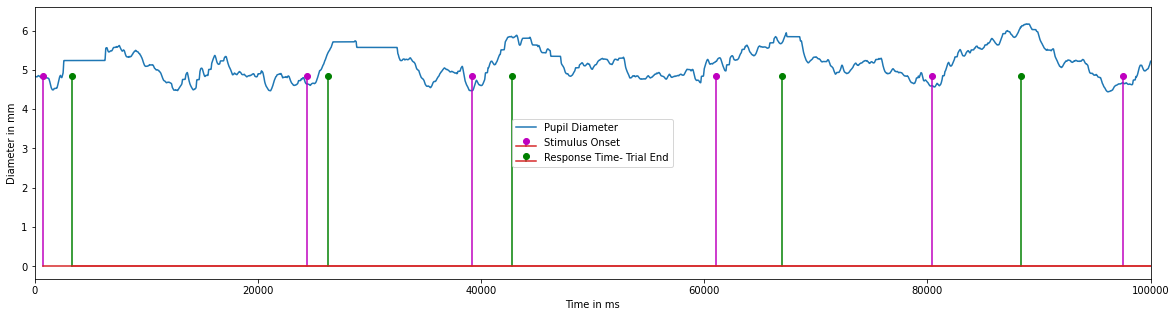

subject_27_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


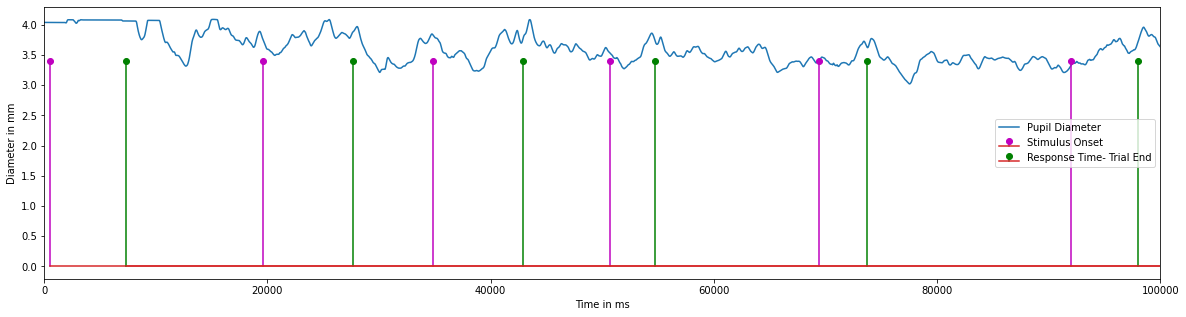

subject_28_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


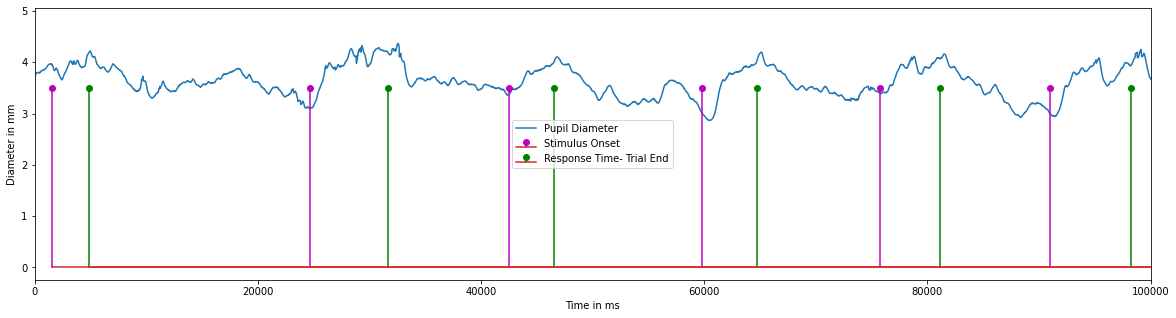

subject_29_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


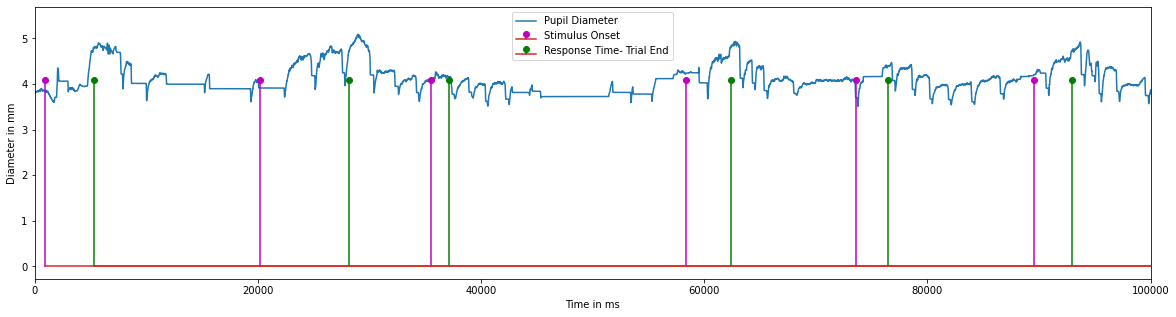

subject_30_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


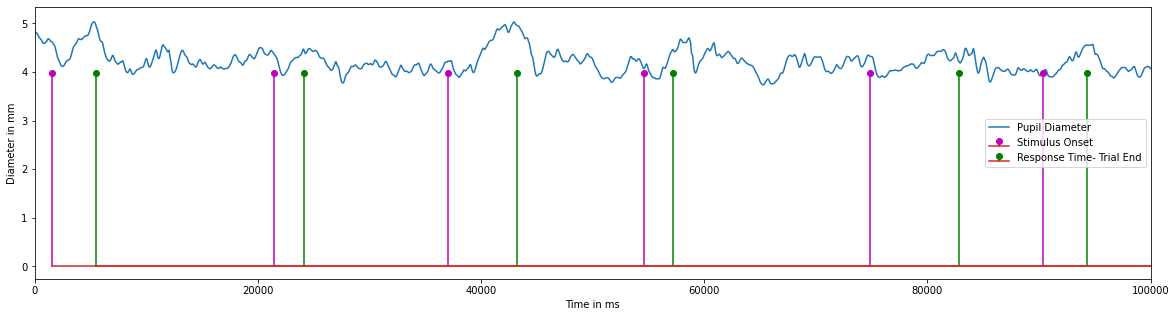

subject_31_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


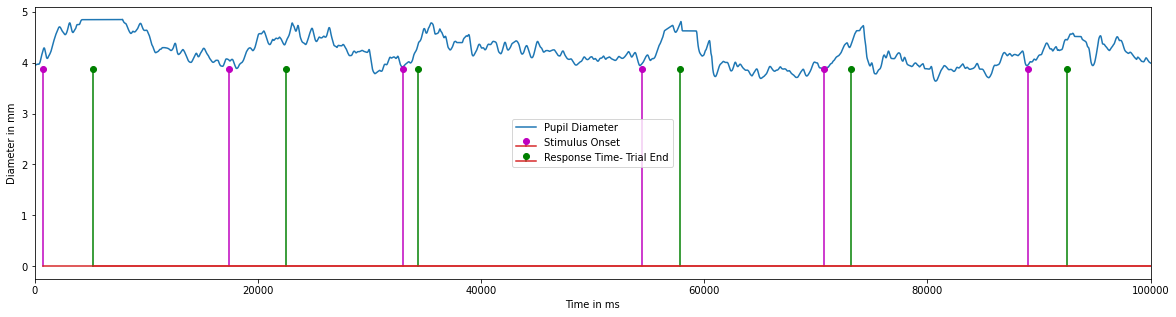

subject_32_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


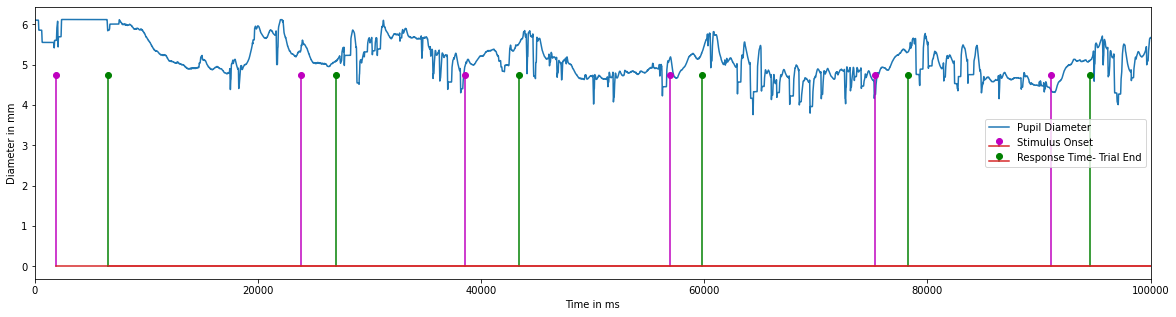

subject_33_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


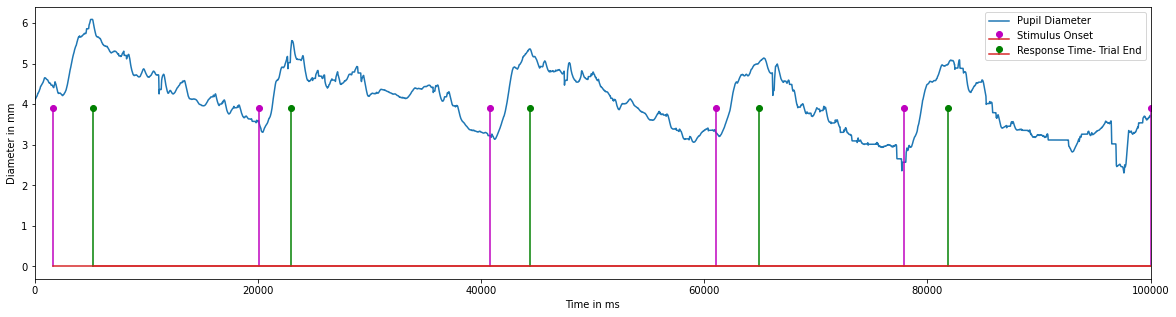

subject_34_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


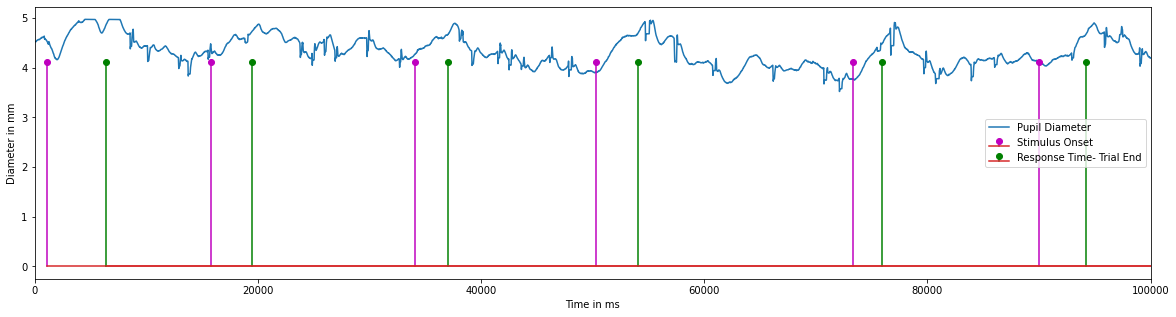

subject_35_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


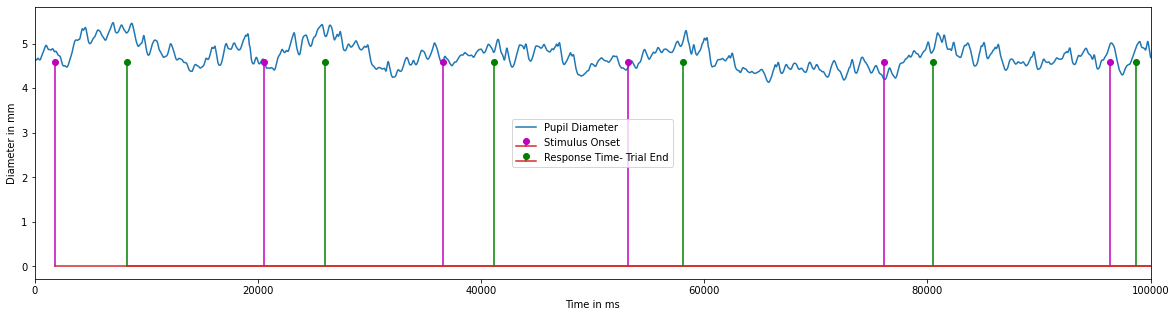

subject_36_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


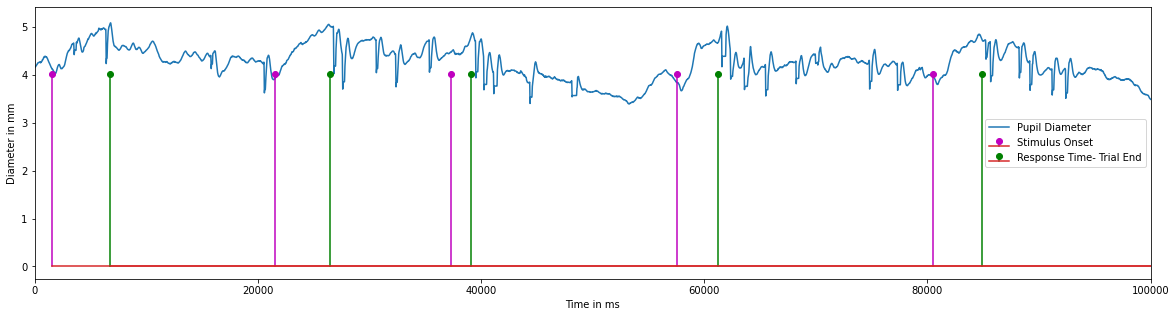

subject_37_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


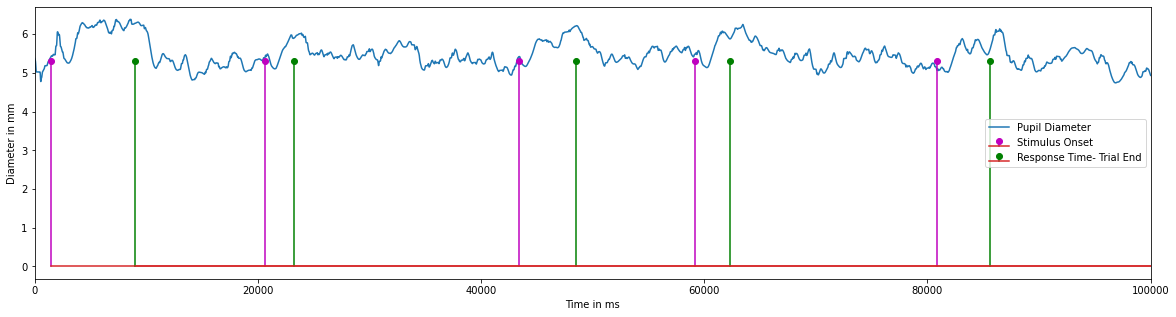

subject_38_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


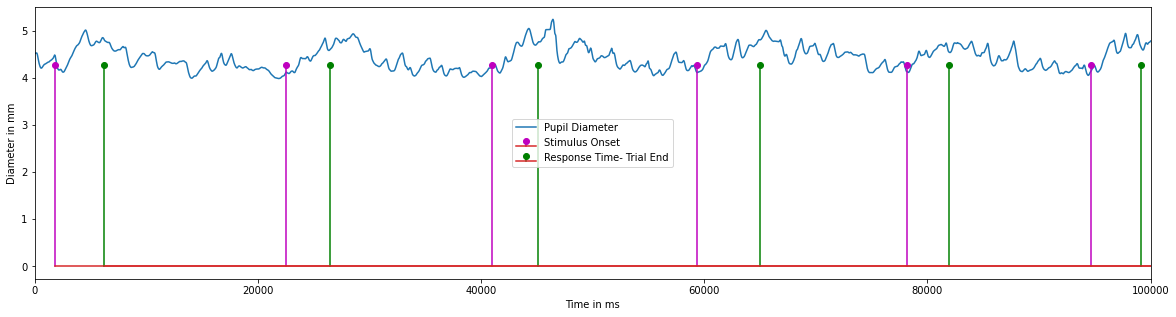

subject_39_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


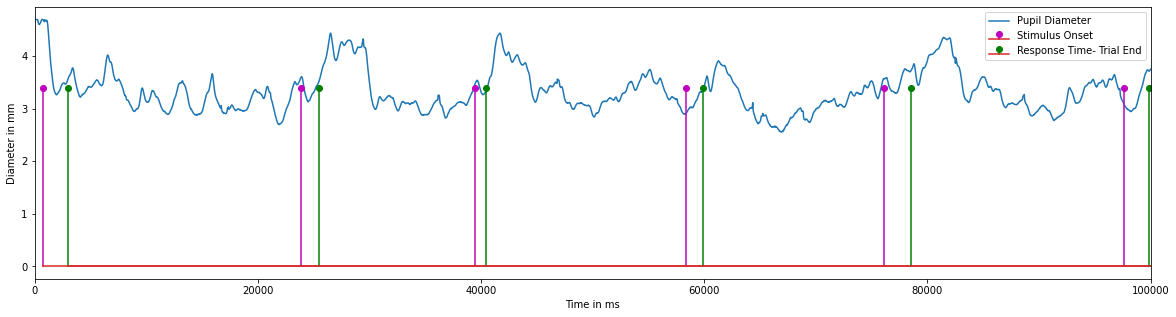

subject_40_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


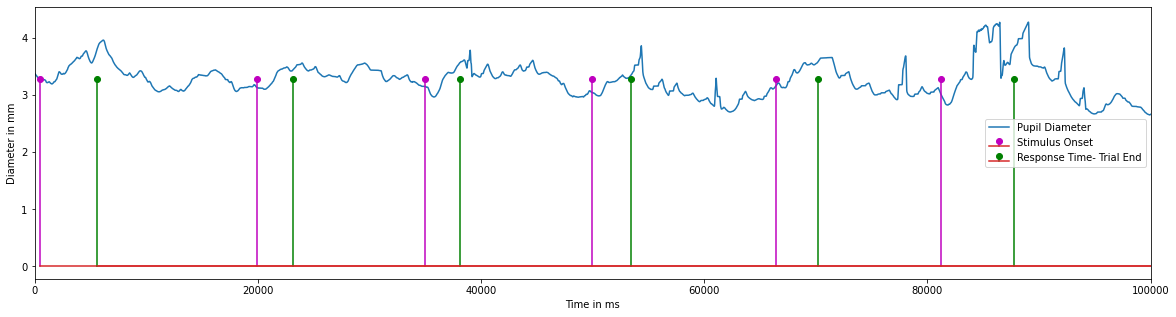

subject_41_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


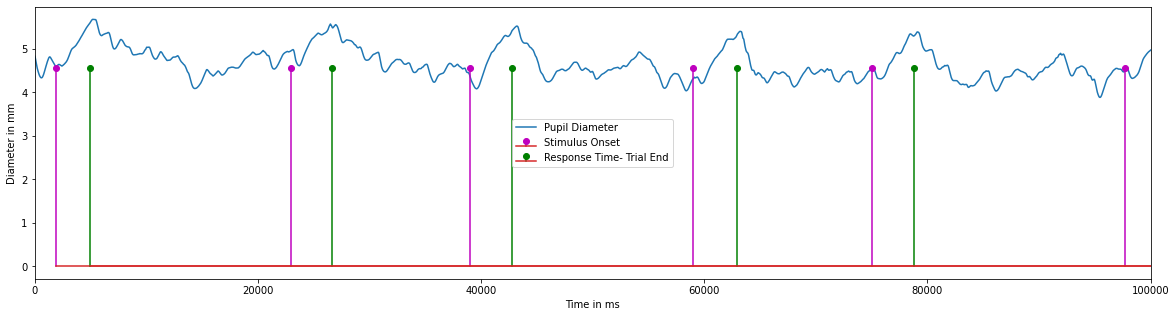

subject_42_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


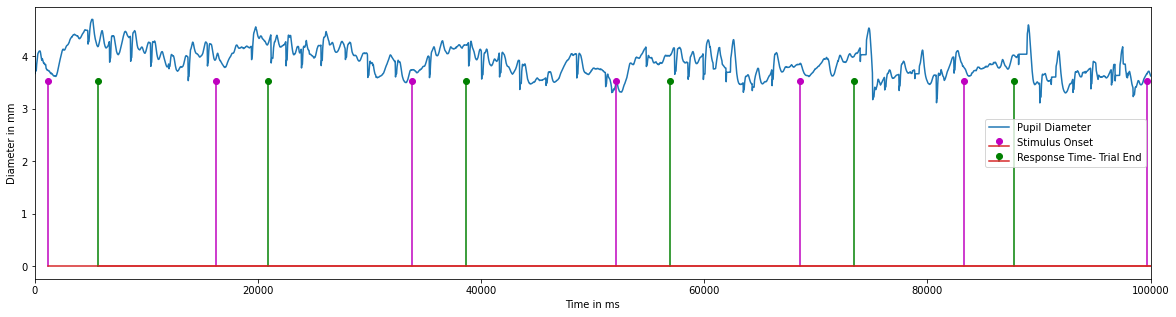

subject_43_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


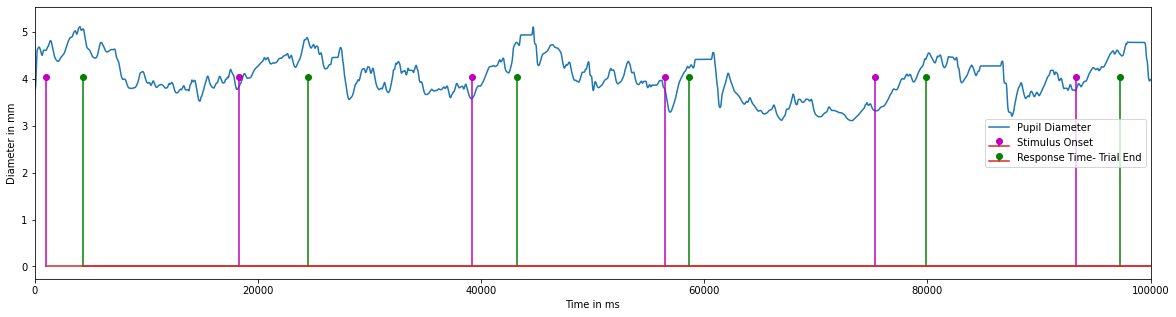

subject_44_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


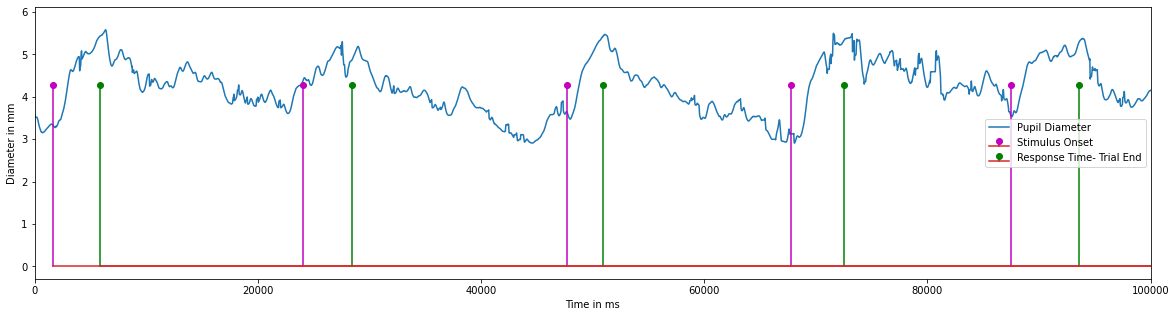

subject_45_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


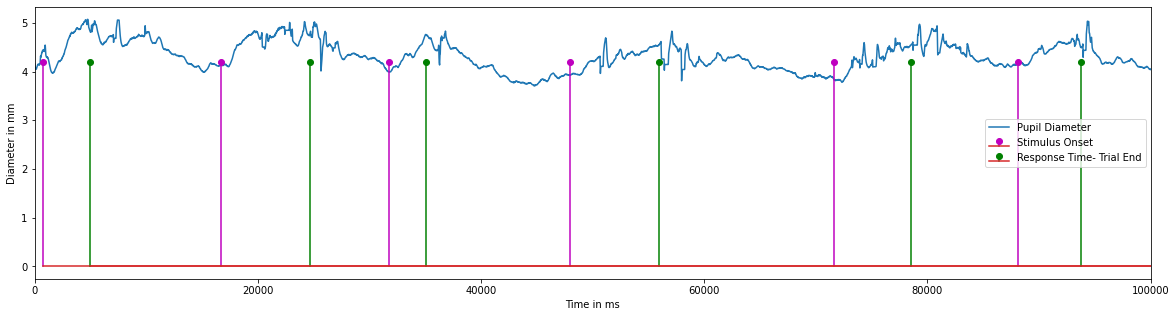

subject_46_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


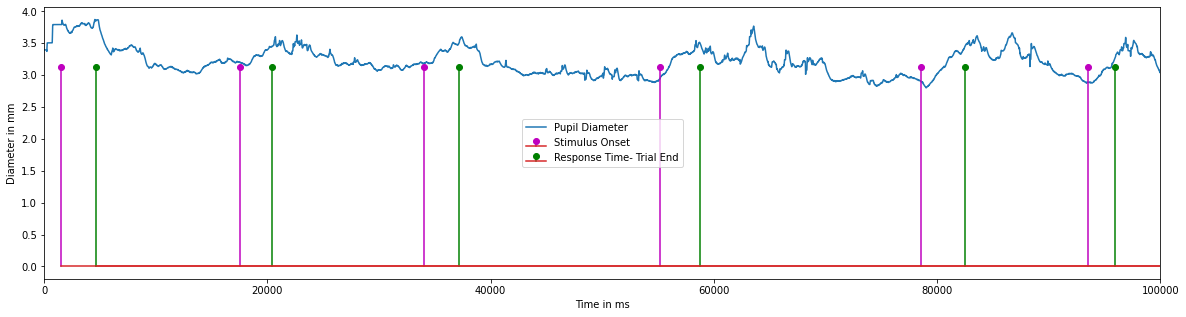

subject_47_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


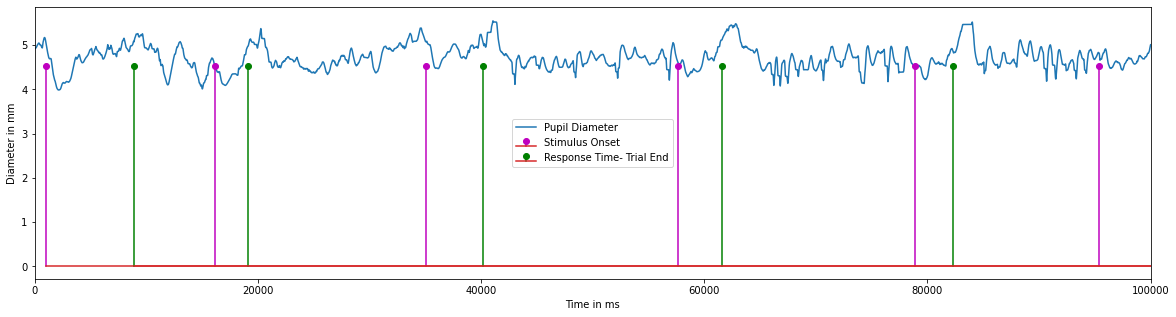

subject_48_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


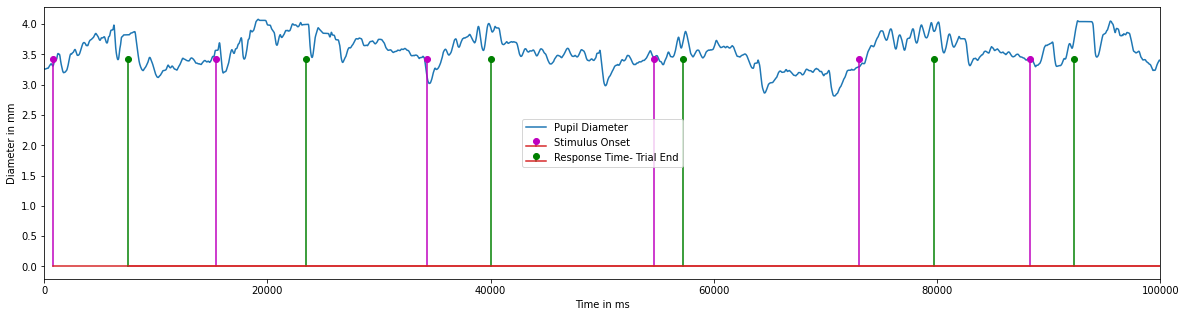

subject_49_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


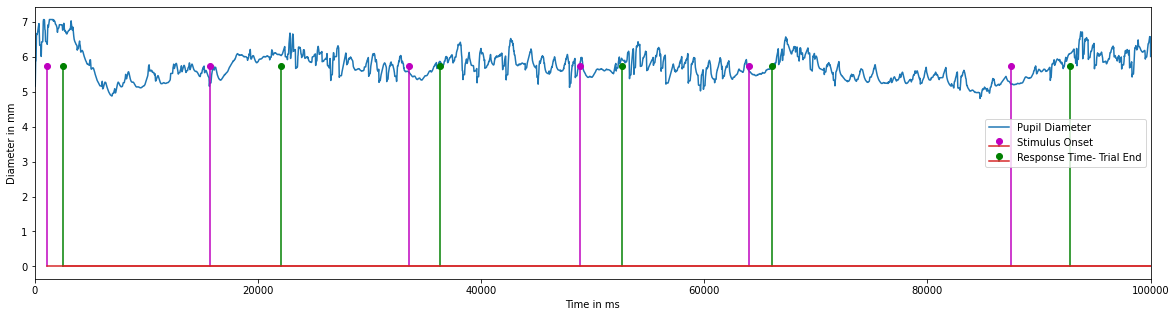

subject_50_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


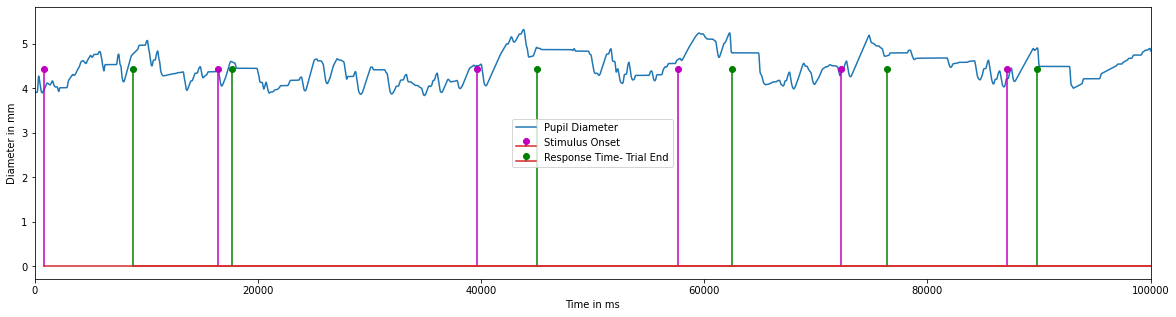

subject_51_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


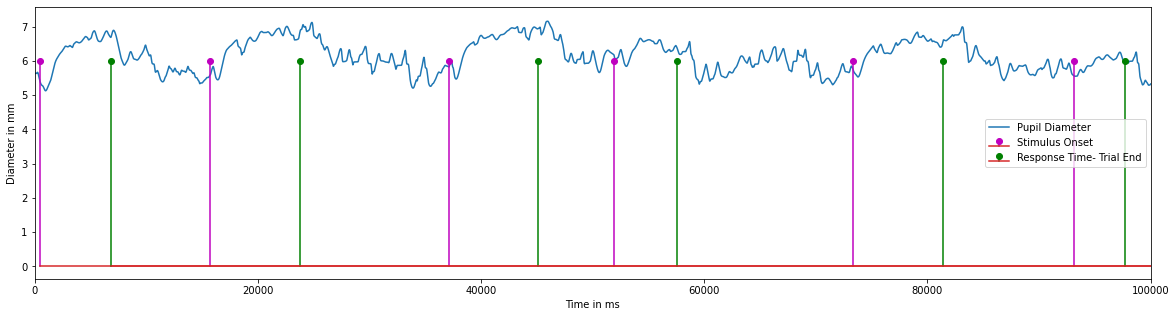

subject_52_pupil


<ipython-input-18-e8c7c0b8025a>:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')
<ipython-input-18-e8c7c0b8025a>:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')


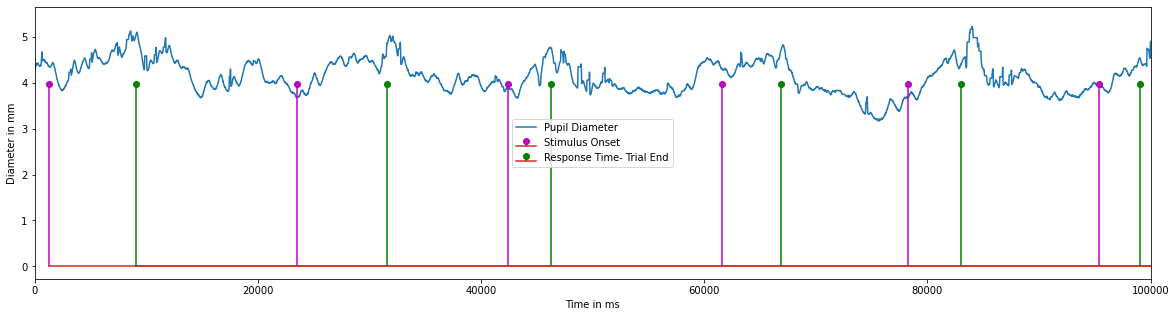

In [ ]:
for i in range(52):
  pupil_sample=pd.read_csv(pupilpaths[i])
  behave_sample=pd.read_csv(behavepaths[i])
  print(pupilpaths[i].stem)
  plt_1=plt.figure(figsize=(20,5))
  y_stimulus=[pupil_sample['Pupil Diameter'].mean()]*len(behave_sample['Time'])
  plt.plot(pupil_sample['Time'],pupil_sample['Pupil Diameter'], label='Pupil Diameter')
  markerline, stemlines,baseline=plt.stem(behave_sample['Time'],y_stimulus, label='Stimulus Onset')

  behave_sample['RT']=[8000 if math.isnan(i) else i for i in behave_sample['RT']]
  markerline2, stemlines2,baseline2=plt.stem(behave_sample['Time']+behave_sample['RT'],y_stimulus, label='Response Time- Trial End')
  plt.ylabel('Diameter in mm')
  plt.xlabel('Time in ms')
  plt.setp(markerline, 'color', 'm')
  plt.setp(stemlines, 'color', 'm')
  plt.setp(markerline2, 'color', 'g')
  plt.setp(stemlines2, 'color', 'g')
  plt.legend()
  plt.xlim(0,100000)
  plt.show()


#### Remove Anomalies

In [ ]:
del pupilpaths[2]
del pupilpaths[18]
del behavepaths[2]
del behavepaths[18]

In [ ]:
len(pupilpaths)

50

## Average Pupil Response

In [ ]:
data=[]
trial_time_data=[]
diff_1_trial_time_data=[]
diff_2_trial_time_data=[]
correct_trial_time_data=[]
wrong_trial_time_data=[]
pupil_at_response=[]

for i in range(50):
  pupil_sample=pd.read_csv(pupilpaths[i])
  behave_sample=pd.read_csv(behavepaths[i])
  subject_id=pupilpaths[i].stem
  trial=0
  k=0
  for j in range(len(behave_sample['Time'])):
    pupil_trial=[]
    trial+=1
    print(subject_id, trial)
    start=behave_sample['Time'][j]
    if math.isnan(behave_sample['RT'][j]):
      end=behave_sample['Time'][j]+8000
    else:
      end=behave_sample['Time'][j]+behave_sample['RT'][j]
    while pupil_sample['Time'][k]<start:
      k+=1
    pupil_first_value=pupil_sample['Pupil Diameter'][k]
    count=0
    sum=0
    while pupil_sample['Time'][k]<=end:
      count+=1
      baseline_diam=pupil_sample['Pupil Diameter'][k]-pupil_first_value
      sum+=baseline_diam
      pupil_trial.append(baseline_diam)
      k+=1
    
    pupil_at_response.append(pupil_trial[-1])
    avg_pupil_resp=sum/count
    data.append([subject_id, trial, avg_pupil_resp,behave_sample['Time'][j],behave_sample['RT'][j],behave_sample['Difficulty'][j],behave_sample['isCorrect'][j]])
    trial_time_data.append(pupil_trial)
    if behave_sample['Difficulty'][j]==1:
      diff_1_trial_time_data.append(pupil_trial)
    else:
      diff_2_trial_time_data.append(pupil_trial)
    if behave_sample['isCorrect'][j]==1:
      correct_trial_time_data.append(pupil_trial)
    else:
      wrong_trial_time_data.append(pupil_trial)


subject_01_pupil 1
subject_01_pupil 2
subject_01_pupil 3
subject_01_pupil 4
subject_01_pupil 5
subject_01_pupil 6
subject_01_pupil 7
subject_01_pupil 8
subject_01_pupil 9
subject_01_pupil 10
subject_01_pupil 11
subject_01_pupil 12
subject_01_pupil 13
subject_01_pupil 14
subject_01_pupil 15
subject_01_pupil 16
subject_01_pupil 17
subject_01_pupil 18
subject_01_pupil 19
subject_01_pupil 20
subject_01_pupil 21
subject_01_pupil 22
subject_01_pupil 23
subject_01_pupil 24
subject_01_pupil 25
subject_01_pupil 26
subject_01_pupil 27
subject_01_pupil 28
subject_01_pupil 29
subject_01_pupil 30
subject_01_pupil 31
subject_01_pupil 32
subject_01_pupil 33
subject_01_pupil 34
subject_01_pupil 35
subject_01_pupil 36
subject_01_pupil 37
subject_01_pupil 38
subject_01_pupil 39
subject_01_pupil 40
subject_02_pupil 1
subject_02_pupil 2
subject_02_pupil 3
subject_02_pupil 4
subject_02_pupil 5
subject_02_pupil 6
subject_02_pupil 7
subject_02_pupil 8
subject_02_pupil 9
subject_02_pupil 10
subject_02_pupil 1

In [ ]:

avg_response_df=pd.DataFrame(data, columns=['subject_id', 'trial_no','avg_pupil_response','Stimulus_onset','RT','Difficulty','isCorrect'])

In [ ]:
avg_response_df

subject_id  trial_no  avg_pupil_response  Stimulus_onset  \
0     subject_01_pupil         1            0.223601        1598.902   
1     subject_01_pupil         2            1.071864       23814.206   
2     subject_01_pupil         3            0.396113       39763.242   
3     subject_01_pupil         4            0.264425       61978.531   
4     subject_01_pupil         5            0.772318       79677.448   
...                ...       ...                 ...             ...   
1995  subject_52_pupil        36           -0.169504      657183.662   
1996  subject_52_pupil        37           -0.319076      673532.666   
1997  subject_52_pupil        38            0.961770      693064.791   
1998  subject_52_pupil        39            1.213922      711630.330   
1999  subject_52_pupil        40            0.378605      726896.064   

               RT  Difficulty  isCorrect  
0     3635.104895           1          1  
1     2853.791475           2          1  
2     2182.772636           2          1  
3     3180.494785           2          0  
4     3880.589724           2          1  
...           ...         ...        ...  
1995  3118.596554           1          1  
1996  1828.583717           1          1  
1997  4305.474758           1          1  
1998  4800.941467           2          1  
1999  2943.220139           1          1  

[2000 rows x 7 columns]

In [ ]:
def append_nan(trial_time_data):
  row_lengths = []
  print(len(correct_trial_time_data))
  for row in trial_time_data:
      row_lengths.append(len(row))

  max_length = max(row_lengths)
  print(max_length)

  for row in trial_time_data:
      while len(row) < max_length:
          row.append(np.nan)
  trial_time_data = np.array(trial_time_data)
  return trial_time_data

In [ ]:
trial_time_data=append_nan(trial_time_data)
diff_1_trial_time_data=append_nan(diff_1_trial_time_data)
diff_2_trial_time_data=append_nan(diff_2_trial_time_data)
correct_trial_time_data=append_nan(correct_trial_time_data)
wrong_trial_time_data=append_nan(wrong_trial_time_data)

1518
2000
1518
2000
1518
2000
1518
2000
1518
2000


In [ ]:
trial_time_df=pd.DataFrame(trial_time_data)
diff_1_trial_time_df=pd.DataFrame(diff_1_trial_time_data)
diff_2_trial_time_df=pd.DataFrame(diff_2_trial_time_data)
correct_trial_time_df=pd.DataFrame(correct_trial_time_data)
wrong_trial_time_df=pd.DataFrame(wrong_trial_time_data)

In [ ]:
trial_time_df

0         1         2         3         4         5         6     \
0      0.0 -0.001284 -0.002765 -0.004494 -0.006521 -0.008919 -0.011712   
1      0.0 -0.000251 -0.000421 -0.000508 -0.000515 -0.000443 -0.000288   
2      0.0  0.001053  0.002226  0.003520  0.004930  0.006457  0.008097   
3      0.0 -0.000066 -0.000129 -0.000187 -0.000240 -0.000286 -0.000326   
4      0.0 -0.002823 -0.005647 -0.008465 -0.011272 -0.014059 -0.016821   
...    ...       ...       ...       ...       ...       ...       ...   
1995   0.0 -0.005240 -0.010607 -0.015663 -0.019912 -0.022858 -0.024459   
1996   0.0 -0.000605 -0.001928 -0.004684 -0.009686 -0.017414 -0.027643   
1997   0.0 -0.006970 -0.018514 -0.033416 -0.049465 -0.064361 -0.076084   
1998   0.0  0.002532  0.004907  0.006660  0.007093  0.005542  0.001775   
1999   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9     ...  1990  1991  1992  1993  1994  1995  \
0    -0.014920 -0.018600 -0.022778  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1    -0.000048  0.000277  0.000691  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2     0.009850  0.011713  0.013683  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3    -0.000360 -0.000388 -0.000412  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4    -0.019547 -0.022228 -0.024856  ...   NaN   NaN   NaN   NaN   NaN   NaN   
...        ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
1995 -0.025191 -0.025776 -0.026598  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1996 -0.039411 -0.051315 -0.061972  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1997 -0.083530 -0.087272 -0.089917  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1998 -0.003865 -0.010717 -0.018175  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1999  0.000000  0.000000  0.000000  ...   NaN   NaN   NaN   NaN   NaN   NaN   

      1996  1997  1998  1999  
0      NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN  
2      NaN   NaN   NaN   NaN  
3      NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...  
1995   NaN   NaN   NaN   NaN  
1996   NaN   NaN   NaN   NaN  
1997   NaN   NaN   NaN   NaN  
1998   NaN   NaN   NaN   NaN  
1999   NaN   NaN   NaN   NaN  

[2000 rows x 2000 columns]

In [ ]:
average_response_over_time=trial_time_df.mean(axis=0)
average_response_over_time

0       0.000000
1      -0.000041
2      -0.000094
3      -0.000147
4      -0.000187
          ...   
1995    0.618151
1996    0.619058
1997    0.620054
1998    0.624042
1999    0.625016
Length: 2000, dtype: float64

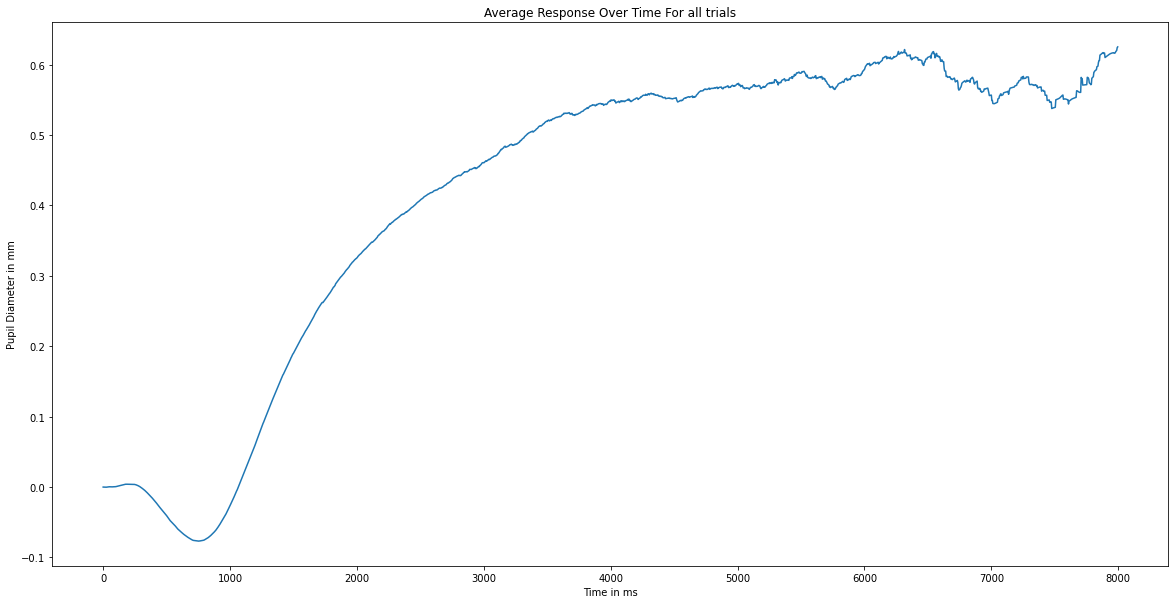

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(0,8000,4),average_response_over_time)
plt.xlabel('Time in ms')
plt.ylabel('Pupil Diameter in mm')
plt.title('Average Response Over Time For all trials')
plt.show()

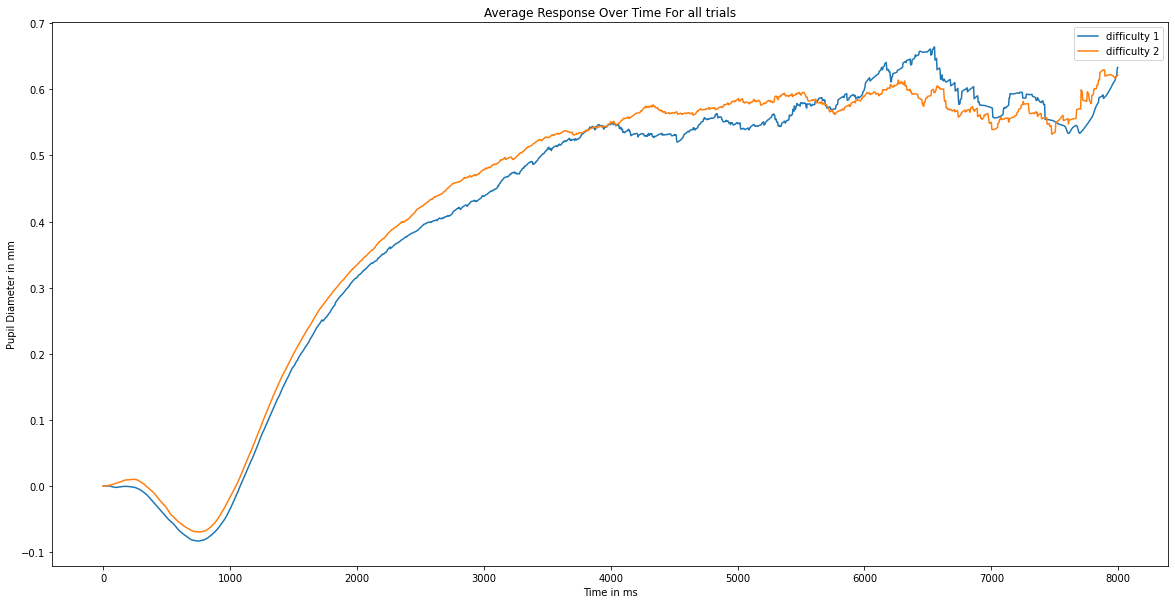

In [ ]:
diff_1_average_response_over_time=diff_1_trial_time_df.mean(axis=0)
diff_2_average_response_over_time=diff_2_trial_time_df.mean(axis=0)

plt.figure(figsize=(20,10))
plt.plot(range(0,8000,4),diff_1_average_response_over_time, label='difficulty 1')
plt.plot(range(0,8000,4),diff_2_average_response_over_time, label='difficulty 2')
plt.xlabel('Time in ms')
plt.ylabel('Pupil Diameter in mm')
plt.title('Average Response Over Time For all trials')
plt.legend()
plt.show()

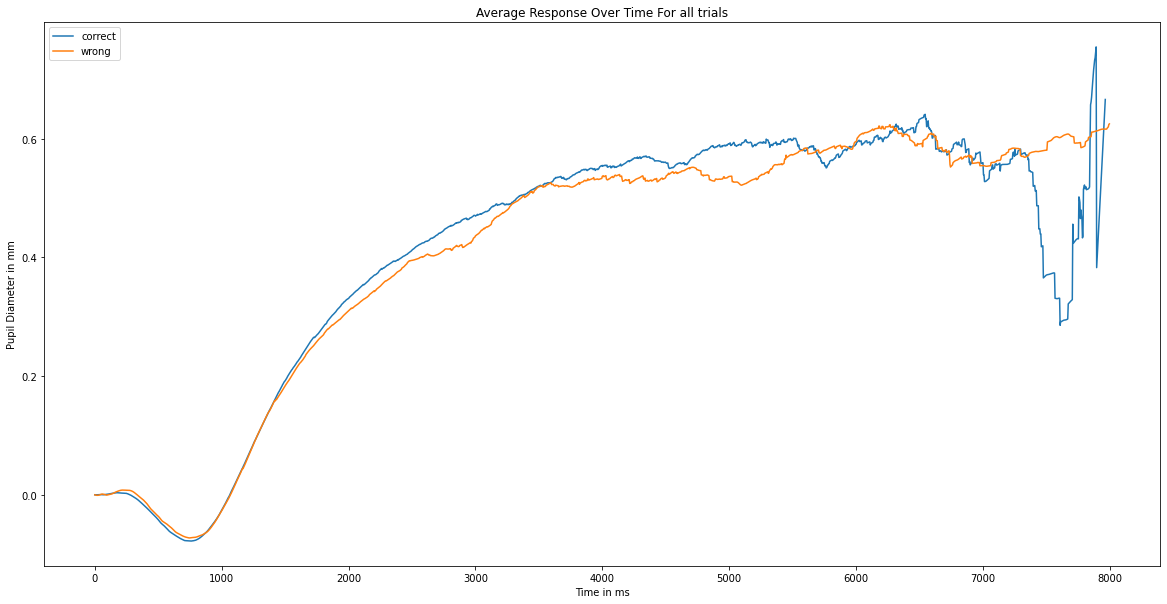

In [ ]:
correct_average_response_over_time=correct_trial_time_df.mean(axis=0)
wrong_average_response_over_time=wrong_trial_time_df.mean(axis=0)

plt.figure(figsize=(20,10))
plt.plot(range(0,8000,4),correct_average_response_over_time, label='correct')
plt.plot(range(0,8000,4),wrong_average_response_over_time, label='wrong')
plt.xlabel('Time in ms')
plt.ylabel('Pupil Diameter in mm')
plt.title('Average Response Over Time For all trials')
plt.legend()
plt.show()

In [ ]:
avg_response_per_subject=[]
for i in range(0,2000,40):
  subject_response=trial_time_df.iloc[i:i+40][::]
  # print(subject_response)
  avg_response_per_subject.append(subject_response.mean(axis=0))

avg_response_per_subject_df=pd.DataFrame(avg_response_per_subject)
avg_response_per_subject_df

0         1         2         3         4         5         6     \
0    0.0 -0.000214 -0.000431 -0.000654 -0.000882 -0.001118 -0.001361   
1    0.0 -0.000065 -0.000137 -0.000219 -0.000311 -0.000414 -0.000525   
2    0.0 -0.000363 -0.000379 -0.000054  0.000464  0.000961  0.001276   
3    0.0 -0.000527 -0.001085 -0.001585 -0.001993 -0.002342 -0.002677   
4    0.0  0.000561  0.001142  0.001738  0.002346  0.002960  0.003576   
5    0.0 -0.000715 -0.001438 -0.002168 -0.002906 -0.003653 -0.004408   
6    0.0 -0.000397 -0.000794 -0.001191 -0.001590 -0.001992 -0.002399   
7    0.0  0.000315  0.000661  0.001037  0.001441  0.001873  0.002333   
8    0.0  0.000255  0.000552  0.000896  0.001284  0.001718  0.002196   
9    0.0 -0.000161 -0.000326 -0.000495 -0.000666 -0.000841 -0.001021   
10   0.0  0.001329  0.002660  0.003740  0.004453  0.004886  0.005256   
11   0.0  0.000099  0.000198  0.000300  0.000404  0.000510  0.000621   
12   0.0  0.000887  0.001749  0.002591  0.003419  0.004237  0.005051   
13   0.0  0.000238  0.000446  0.000711  0.001086  0.001568  0.002116   
14   0.0 -0.000325 -0.000681 -0.001071 -0.001492 -0.001939 -0.002418   
15   0.0 -0.000374 -0.000761 -0.001159 -0.001567 -0.001980 -0.002397   
16   0.0 -0.000256 -0.000491 -0.000707 -0.000905 -0.001086 -0.001253   
17   0.0 -0.000460 -0.000919 -0.001386 -0.001846 -0.002245 -0.002530   
18   0.0  0.000435  0.000852  0.001244  0.001595  0.001911  0.002214   
19   0.0  0.000170  0.000356  0.000555  0.000763  0.000977  0.001194   
20   0.0 -0.001520 -0.003332 -0.005600 -0.008163 -0.010601 -0.012450   
21   0.0 -0.000097 -0.000188 -0.000274 -0.000354 -0.000429 -0.000500   
22   0.0  0.000369  0.000737  0.001102  0.001463  0.001819  0.002168   
23   0.0  0.000195  0.000431  0.000707  0.001019  0.001364  0.001738   
24   0.0 -0.000068 -0.000139 -0.000210 -0.000281 -0.000350 -0.000417   
25   0.0 -0.000006 -0.000034 -0.000046 -0.000025  0.000051  0.000217   
26   0.0 -0.003055 -0.005519 -0.007278 -0.008450 -0.009222 -0.009729   
27   0.0 -0.000408 -0.000810 -0.001207 -0.001596 -0.001976 -0.002347   
28   0.0 -0.000187 -0.000381 -0.000582 -0.000788 -0.000999 -0.001213   
29   0.0  0.002034  0.003471  0.004293  0.004718  0.005115  0.005815   
30   0.0 -0.000866 -0.001950 -0.002950 -0.003567 -0.003688 -0.003421   
31   0.0 -0.000365 -0.000718 -0.001005 -0.001207 -0.001344 -0.001456   
32   0.0  0.000709  0.001418  0.002124  0.002823  0.003516  0.004198   
33   0.0 -0.000116 -0.000390 -0.000812 -0.001322 -0.001872 -0.002467   
34   0.0 -0.000241 -0.000460 -0.000650 -0.000801 -0.000910 -0.000976   
35   0.0 -0.000333 -0.000685 -0.001056 -0.001441 -0.001839 -0.002249   
36   0.0  0.000060  0.000086  0.000055 -0.000021 -0.000088 -0.000128   
37   0.0  0.000897  0.001713  0.002424  0.003022  0.003508  0.003895   
38   0.0 -0.000117 -0.000238 -0.000363 -0.000491 -0.000624 -0.000761   
39   0.0  0.000405  0.000753  0.001072  0.001409  0.001808  0.002310   
40   0.0  0.000072  0.000173  0.000301  0.000454  0.000633  0.000828   
41   0.0 -0.000171 -0.000373 -0.000560 -0.000693 -0.000750 -0.000731   
42   0.0 -0.000187 -0.000347 -0.000455 -0.000514 -0.000530 -0.000483   
43   0.0 -0.000229 -0.000457 -0.000583 -0.000526 -0.000264  0.000173   
44   0.0  0.000071  0.000118  0.000141  0.000125  0.000057 -0.000084   
45   0.0  0.000411  0.000809  0.001193  0.001566  0.001926  0.002275   
46   0.0 -0.000017  0.000109  0.000454  0.001012  0.001724  0.002605   
47   0.0 -0.000425 -0.000839 -0.001239 -0.001620 -0.001981 -0.002319   
48   0.0  0.000317  0.000670  0.001053  0.001473  0.001922  0.002398   
49   0.0  0.000364  0.000498  0.000472  0.000343  0.000036 -0.000595   

        7         8         9     ...      1990      1991      1992      1993  \
0  -0.001612 -0.001874 -0.002147  ...       NaN       NaN       NaN       NaN   
1  -0.000644 -0.000766 -0.000886  ...  1.327079  1.327327  1.327595  1.327880   
2   0.001348  0.001191  0.000858  ...  0.359229  0.359483  0.359257  0.358895   
3  -0.0

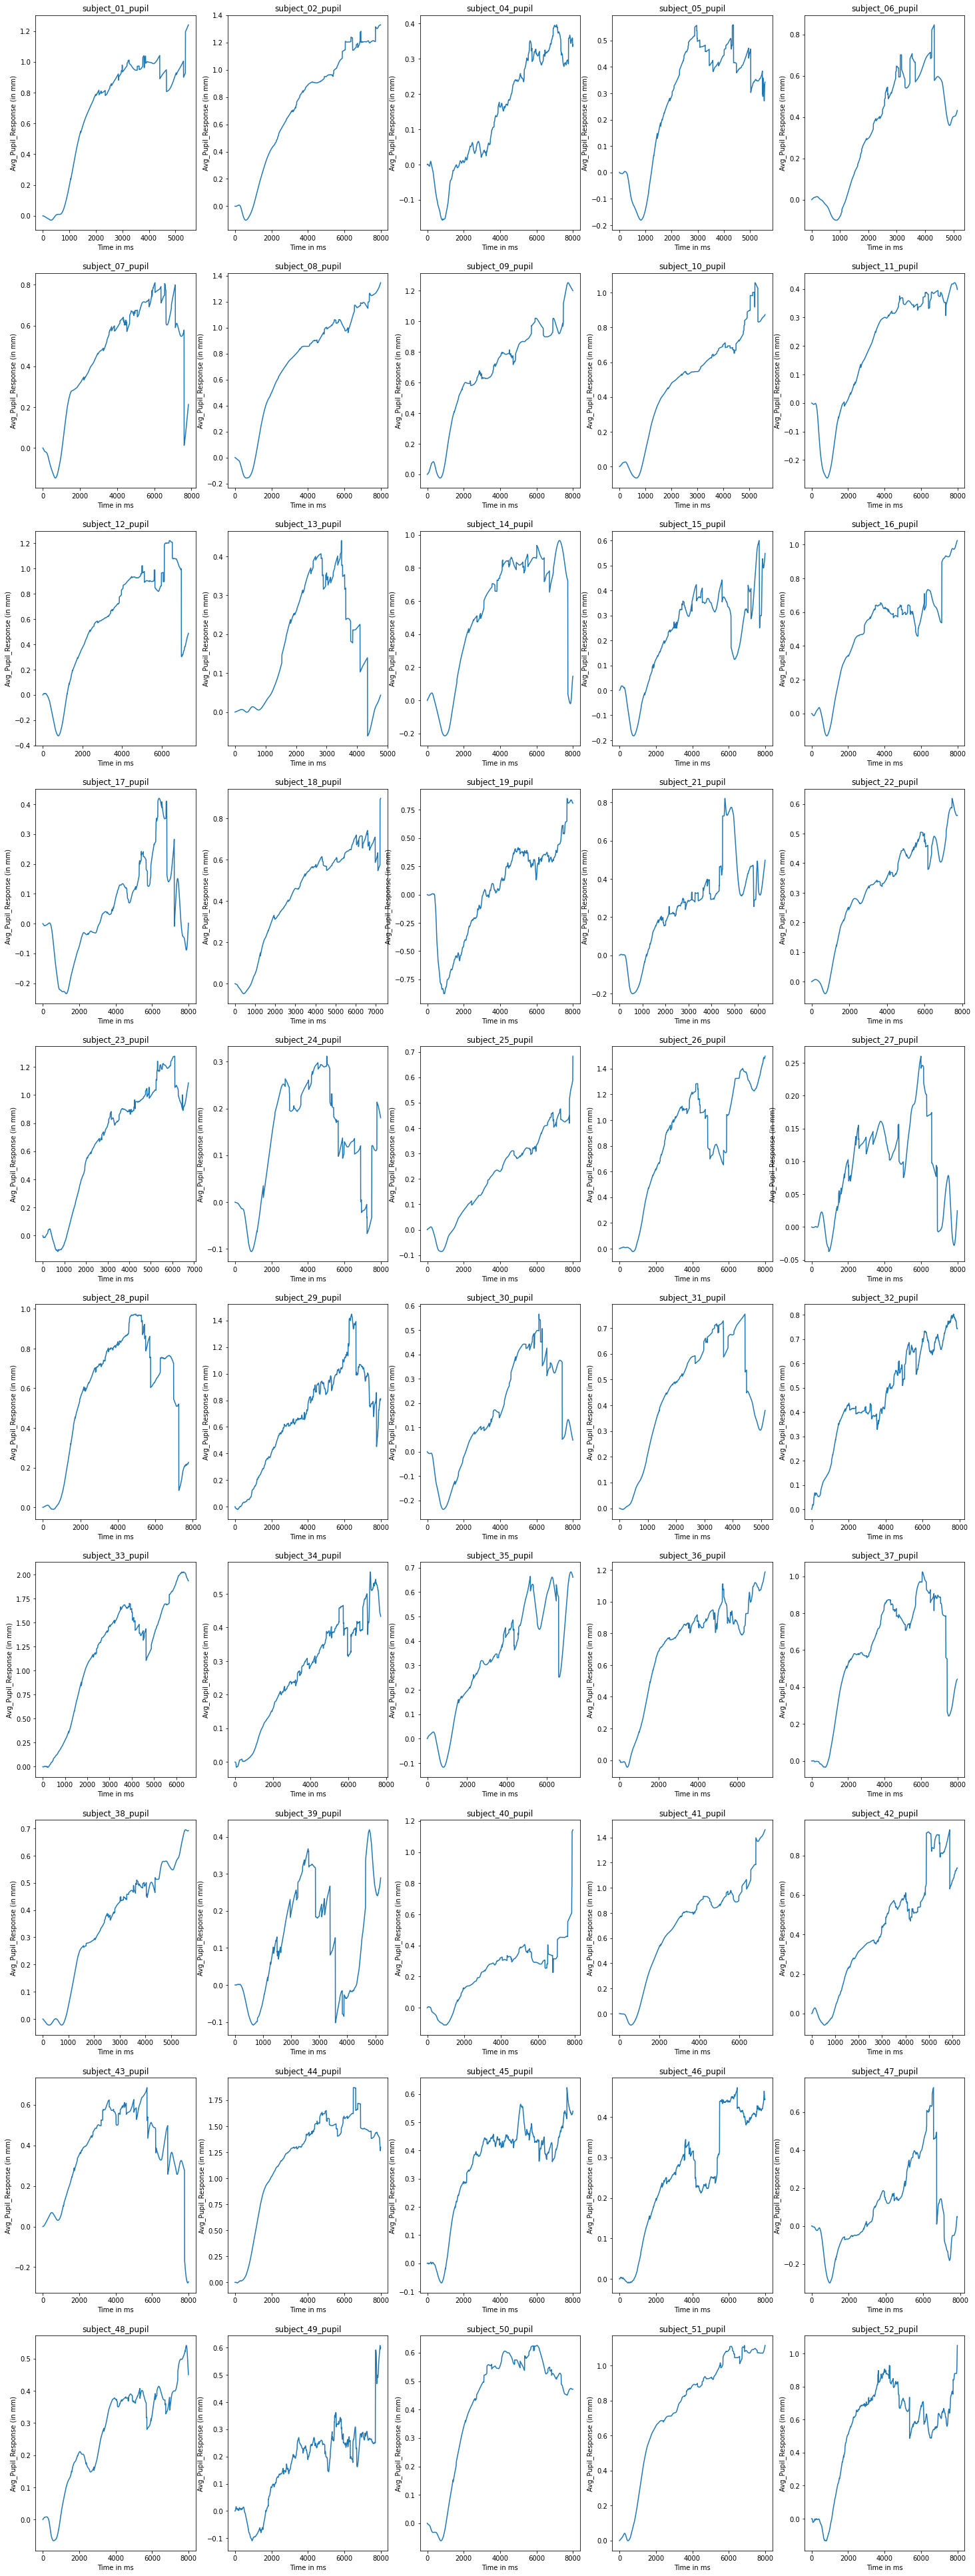

In [ ]:
plt1=plt.figure(figsize=(25,70))
for i in range(len(pupilpaths)):
  subject_id=pupilpaths[i].stem
  plt.subplot(10, 5, i+1)
  sns.lineplot(x=range(0,8000,4),y=avg_response_per_subject_df.iloc[i])
  plt.title(subject_id)
  plt.xlabel('Time in ms')
  plt.ylabel('Avg_Pupil_Response (in mm)')
  plt.title(pupilpaths[i].stem)

plt.show()  

In [ ]:
trial_time_df

0         1         2         3         4         5         6     \
0      0.0 -0.001284 -0.002765 -0.004494 -0.006521 -0.008919 -0.011712   
1      0.0 -0.000251 -0.000421 -0.000508 -0.000515 -0.000443 -0.000288   
2      0.0  0.001053  0.002226  0.003520  0.004930  0.006457  0.008097   
3      0.0 -0.000066 -0.000129 -0.000187 -0.000240 -0.000286 -0.000326   
4      0.0 -0.002823 -0.005647 -0.008465 -0.011272 -0.014059 -0.016821   
...    ...       ...       ...       ...       ...       ...       ...   
1995   0.0 -0.005240 -0.010607 -0.015663 -0.019912 -0.022858 -0.024459   
1996   0.0 -0.000605 -0.001928 -0.004684 -0.009686 -0.017414 -0.027643   
1997   0.0 -0.006970 -0.018514 -0.033416 -0.049465 -0.064361 -0.076084   
1998   0.0  0.002532  0.004907  0.006660  0.007093  0.005542  0.001775   
1999   0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9     ...  1990  1991  1992  1993  1994  1995  \
0    -0.014920 -0.018600 -0.022778  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1    -0.000048  0.000277  0.000691  ...   NaN   NaN   NaN   NaN   NaN   NaN   
2     0.009850  0.011713  0.013683  ...   NaN   NaN   NaN   NaN   NaN   NaN   
3    -0.000360 -0.000388 -0.000412  ...   NaN   NaN   NaN   NaN   NaN   NaN   
4    -0.019547 -0.022228 -0.024856  ...   NaN   NaN   NaN   NaN   NaN   NaN   
...        ...       ...       ...  ...   ...   ...   ...   ...   ...   ...   
1995 -0.025191 -0.025776 -0.026598  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1996 -0.039411 -0.051315 -0.061972  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1997 -0.083530 -0.087272 -0.089917  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1998 -0.003865 -0.010717 -0.018175  ...   NaN   NaN   NaN   NaN   NaN   NaN   
1999  0.000000  0.000000  0.000000  ...   NaN   NaN   NaN   NaN   NaN   NaN   

      1996  1997  1998  1999  
0      NaN   NaN   NaN   NaN  
1      NaN   NaN   NaN   NaN  
2      NaN   NaN   NaN   NaN  
3      NaN   NaN   NaN   NaN  
4      NaN   NaN   NaN   NaN  
...    ...   ...   ...   ...  
1995   NaN   NaN   NaN   NaN  
1996   NaN   NaN   NaN   NaN  
1997   NaN   NaN   NaN   NaN  
1998   NaN   NaN   NaN   NaN  
1999   NaN   NaN   NaN   NaN  

[2000 rows x 2000 columns]

# Step 3

In [ ]:
peak_pupil=trial_time_df.max(axis=1)
peak_pupil

0       1.224777
1       1.806894
2       0.685657
3       0.734249
4       1.378393
          ...   
1995    0.188448
1996    0.014736
1997    1.822619
1998    1.890446
1999    1.166643
Length: 2000, dtype: float64

In [ ]:
latency_time_idx=trial_time_df.idxmax(axis=1)
latency_time=latency_time_idx*4
latency_time

0       3632
1       2848
2       1548
3       3176
4       3876
        ... 
1995    2356
1996    1824
1997    4168
1998    3476
1999    2812
Length: 2000, dtype: int64

In [ ]:
avg_response_df['peak_pupil_response']=peak_pupil
avg_response_df['latency_to_peak']=latency_time

avg_response_df

subject_id  trial_no  avg_pupil_response  Stimulus_onset  \
0     subject_01_pupil         1            0.223601        1598.902   
1     subject_01_pupil         2            1.071864       23814.206   
2     subject_01_pupil         3            0.396113       39763.242   
3     subject_01_pupil         4            0.264425       61978.531   
4     subject_01_pupil         5            0.772318       79677.448   
...                ...       ...                 ...             ...   
1995  subject_52_pupil        36           -0.169504      657183.662   
1996  subject_52_pupil        37           -0.319076      673532.666   
1997  subject_52_pupil        38            0.961770      693064.791   
1998  subject_52_pupil        39            1.213922      711630.330   
1999  subject_52_pupil        40            0.378605      726896.064   

               RT  Difficulty  isCorrect  peak_pupil_response  latency_to_peak  
0     3635.104895           1          1             1.224777             3632  
1     2853.791475           2          1             1.806894             2848  
2     2182.772636           2          1             0.685657             1548  
3     3180.494785           2          0             0.734249             3176  
4     3880.589724           2          1             1.378393             3876  
...           ...         ...        ...                  ...              ...  
1995  3118.596554           1          1             0.188448             2356  
1996  1828.583717           1          1             0.014736             1824  
1997  4305.474758           1          1             1.822619             4168  
1998  4800.941467           2          1             1.890446             3476  
1999  2943.220139           1          1             1.166643             2812  

[2000 rows x 9 columns]

In [ ]:
avg_response_df['velocity']=avg_response_df['peak_pupil_response']/avg_response_df['latency_to_peak']
avg_response_df['acceleration']=avg_response_df['velocity']/avg_response_df['latency_to_peak']

In [ ]:
avg_response_df

subject_id  trial_no  avg_pupil_response  Stimulus_onset  \
0     subject_01_pupil         1            0.223601        1598.902   
1     subject_01_pupil         2            1.071864       23814.206   
2     subject_01_pupil         3            0.396113       39763.242   
3     subject_01_pupil         4            0.264425       61978.531   
4     subject_01_pupil         5            0.772318       79677.448   
...                ...       ...                 ...             ...   
1995  subject_52_pupil        36           -0.169504      657183.662   
1996  subject_52_pupil        37           -0.319076      673532.666   
1997  subject_52_pupil        38            0.961770      693064.791   
1998  subject_52_pupil        39            1.213922      711630.330   
1999  subject_52_pupil        40            0.378605      726896.064   

               RT  Difficulty  isCorrect  peak_pupil_response  \
0     3635.104895           1          1             1.224777   
1     2853.791475           2          1             1.806894   
2     2182.772636           2          1             0.685657   
3     3180.494785           2          0             0.734249   
4     3880.589724           2          1             1.378393   
...           ...         ...        ...                  ...   
1995  3118.596554           1          1             0.188448   
1996  1828.583717           1          1             0.014736   
1997  4305.474758           1          1             1.822619   
1998  4800.941467           2          1             1.890446   
1999  2943.220139           1          1             1.166643   

      latency_to_peak  velocity  acceleration  
0                3632  0.000337  9.284646e-08  
1                2848  0.000634  2.227679e-07  
2                1548  0.000443  2.861311e-07  
3                3176  0.000231  7.279179e-08  
4                3876  0.000356  9.174988e-08  
...               ...       ...           ...  
1995             2356  0.000080  3.395009e-08  
1996             1824  0.000008  4.429247e-09  
1997             4168  0.000437  1.049157e-07  
1998             3476  0.000544  1.564605e-07  
1999             2812  0.000415  1.475392e-07  

[2000 rows x 11 columns]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


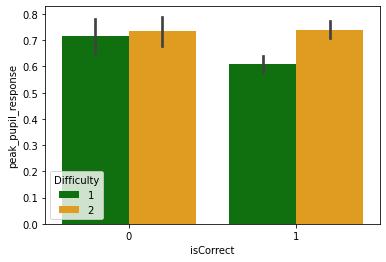

In [ ]:
sns.barplot(avg_response_df['isCorrect'],avg_response_df['peak_pupil_response'], hue=avg_response_df['Difficulty'],palette=['green','orange'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


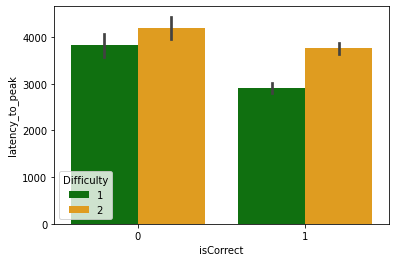

In [ ]:
sns.barplot(avg_response_df['isCorrect'],avg_response_df['latency_to_peak'], hue=avg_response_df['Difficulty'],palette=['green','orange'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


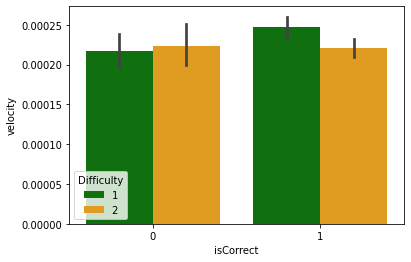

In [ ]:
sns.barplot(avg_response_df['isCorrect'],avg_response_df['velocity'], hue=avg_response_df['Difficulty'],palette=['green','orange'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


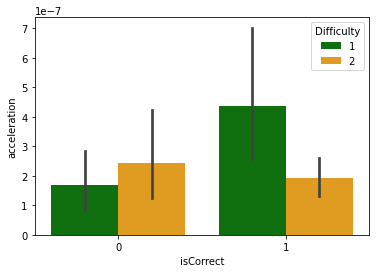

In [ ]:
sns.barplot(avg_response_df['isCorrect'],avg_response_df['acceleration'], hue=avg_response_df['Difficulty'],palette=['green','orange'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


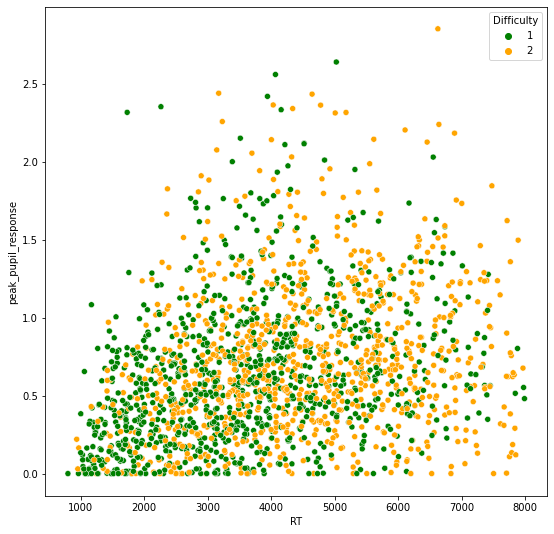

In [ ]:
fig, ax = plt.subplots(figsize = (9, 9))
sns.scatterplot(avg_response_df['RT'],avg_response_df['peak_pupil_response'], hue=avg_response_df['Difficulty'],palette=['green','orange'],)

# Step 4: Modelling

In [ ]:
from sklearn import preprocessing                                               
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold                     
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgbm
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA


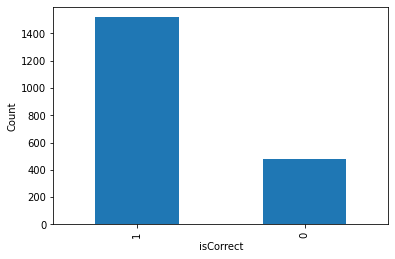

In [ ]:
avg_response_df.value_counts(avg_response_df['isCorrect']).plot.bar()
plt.ylabel('Count')
plt.show()

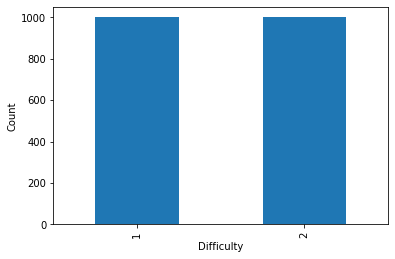

In [ ]:
avg_response_df.value_counts(avg_response_df['Difficulty']).plot.bar()
plt.ylabel('Count')
plt.show()

## Classification Model for Difficulty

In [ ]:
difficulty_df=avg_response_df.copy(deep=True)

In [ ]:
difficulty_df.describe()

trial_no  avg_pupil_response  Stimulus_onset           RT  \
count  2000.000000         2000.000000     2000.000000  1928.000000   
mean     20.500000            0.255903   364308.092720  4048.438267   
std      11.546283            0.341212   214719.533721  1636.442391   
min       1.000000           -0.936069      509.437000   797.361135   
25%      10.750000            0.028899   178556.705250  2807.326556   
50%      20.500000            0.228672   365858.525000  3938.624859   
75%      30.250000            0.431843   551031.689500  5293.967545   
max      40.000000            2.036693   729232.238000  7992.403507   

        Difficulty    isCorrect  peak_pupil_response  latency_to_peak  \
count  2000.000000  2000.000000          2000.000000      2000.000000   
mean      1.500000     0.759000             0.684672      3486.178000   
std       0.500125     0.427797             0.466999      1790.646455   
min       1.000000     0.000000             0.000000         0.000000   
25%       1.000000     1.000000             0.343013      2267.000000   
50%       1.500000     1.000000             0.618219      3460.000000   
75%       2.000000     1.000000             0.941370      4709.000000   
max       2.000000     1.000000             2.852988      7996.000000   

          velocity  acceleration  
count  1950.000000  1.950000e+03  
mean      0.000231  2.941516e-07  
std       0.000183  2.212604e-06  
min       0.000003  8.176005e-10  
25%       0.000118  2.804941e-08  
50%       0.000193  5.634771e-08  
75%       0.000291  1.097788e-07  
max       0.002490  7.781055e-05

In [ ]:
difficulty_df=difficulty_df.drop(['Stimulus_onset','RT','isCorrect','subject_id','trial_no','avg_pupil_response'],axis=1)

In [ ]:
difficulty_df

Difficulty  peak_pupil_response  latency_to_peak  velocity  acceleration
0              1             1.224777             3632  0.000337  9.284646e-08
1              2             1.806894             2848  0.000634  2.227679e-07
2              2             0.685657             1548  0.000443  2.861311e-07
3              2             0.734249             3176  0.000231  7.279179e-08
4              2             1.378393             3876  0.000356  9.174988e-08
...          ...                  ...              ...       ...           ...
1995           1             0.188448             2356  0.000080  3.395009e-08
1996           1             0.014736             1824  0.000008  4.429247e-09
1997           1             1.822619             4168  0.000437  1.049157e-07
1998           2             1.890446             3476  0.000544  1.564605e-07
1999           1             1.166643             2812  0.000415  1.475392e-07

[2000 rows x 5 columns]

In [ ]:
difficulty_df.isnull().sum()

Difficulty              0
peak_pupil_response     0
latency_to_peak         0
velocity               50
acceleration           50
dtype: int64

In [ ]:
difficulty_df['velocity'] = difficulty_df['velocity'].fillna(0)
difficulty_df['acceleration'] = difficulty_df['acceleration'].fillna(0)

In [ ]:
difficulty_df.isnull().sum()

Difficulty             0
peak_pupil_response    0
latency_to_peak        0
velocity               0
acceleration           0
dtype: int64

In [ ]:
X=difficulty_df.drop('Difficulty',axis=1)
y=difficulty_df['Difficulty']

In [ ]:
# Split into train and val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20) 

In [ ]:
# Standardize features by removing mean and scaling to unit variance:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val) 

In [ ]:
def model_fit(X_train,y_train,X_test,model):
  model.fit(X_train,y_train)
  y_pred_prob=model.predict_proba(X_test)[:,1]
  y_pred=model.predict(X_test)
  return y_pred_prob,y_pred

In [ ]:
def pca_model_fit(X_train,y_train,X_test,model):
  pca = PCA(.95) 
  X_train=pca.fit_transform(X_train)
  model.fit(X_train,y_train)
  y_pred_prob=model.predict_proba(pca.transform(X_test))[:,1]
  y_pred=model.predict(pca.transform(X_test))
  return y_pred_prob,y_pred


In [ ]:
# Leave one out train/test
def train_predict(X,y,model):
  y_test = []
  y_pred = []
  y_pred_prob = []
  for i in range(X.shape[0]):
      
      X_train = X.iloc[:, :].drop(i)
      
      y_train = y.drop(i)
     
      X_test = X.iloc[[i], :]
     
      y_test.append(y[i])
      scaler = StandardScaler()
      scaler.fit(X_train)

      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test) 
      model.fit(X_train, y_train)  
      y_pred_prob.append(model.predict_proba(X_test)[:,1][0])
      y_pred.append(model.predict(X_test)[0])
  return (y_test,y_pred_prob, y_pred)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(.95) # choose the minimum number of principal components such that 95% of the variance is retained.

def pca_train_predict(df_loe_pre,model,target):
  y_test = []
  y_pred = []
  y_pred_prob=[]
  for i in range(X.shape[0]):
      X_train = X.iloc[:, :].drop(i)
      
      y_train = y.drop(i)
     
      X_test = X.iloc[[i], :]
     
      y_test.append(y[i])
      scaler = StandardScaler()
      scaler.fit(X_train)

      X_train = scaler.transform(X_train)
      X_test = scaler.transform(X_test) 
      X_train=pca.fit_transform(X_train)
      model.fit(X_train, y_train)  
      y_pred_prob.append(model.predict_proba(pca.transform(X_test))[:,1][0])
      y_pred.append(model.predict(pca.transform(X_test))[0])
  return (y_test,y_pred_prob, y_pred)

#### Logistic Regression

In [ ]:
log_classifier=LogisticRegression()
y_pred_prob,y_pred=model_fit(X_train,y_train,X_val,log_classifier)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.60      0.59      0.60       192
           2       0.63      0.63      0.63       208

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400

Validation Accuracy: 0.615
ROC_AUC Score:0.6546474358974359
[[114  78]
 [ 76 132]]


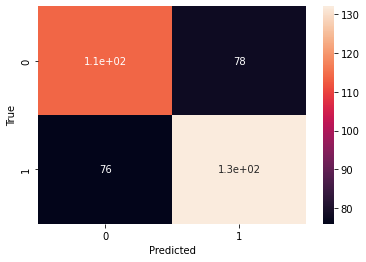

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

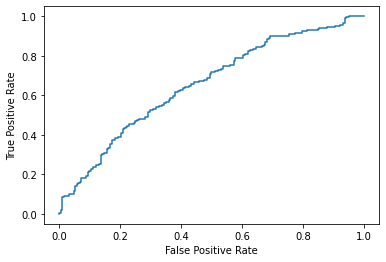

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Random Forest Classifier

In [ ]:
rf_classifier=RandomForestClassifier(random_state=53)
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,rf_classifier)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.49      0.53      0.51       192
           2       0.53      0.49      0.51       208

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.51       400
weighted avg       0.51      0.51      0.51       400

Validation Accuracy: 0.5075
ROC_AUC Score:0.512031750801282
[[101  91]
 [106 102]]


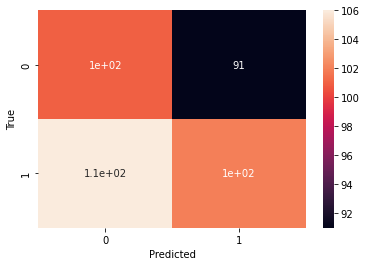

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

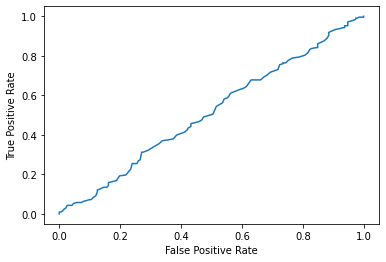

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### KNN Classifier

In [ ]:
knn_classifier=KNeighborsClassifier()
y_pred_prob,y_pred=model_fit(X_train,y_train,X_val,knn_classifier)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.48      0.48      0.48       192
           2       0.52      0.52      0.52       208

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400

Validation Accuracy: 0.5025
ROC_AUC Score:0.521572015224359
[[ 93  99]
 [100 108]]


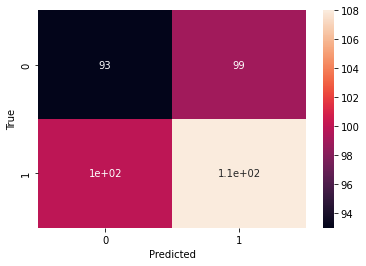

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

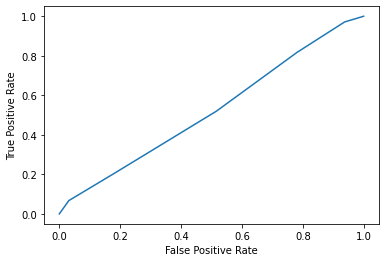

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Gaussian NB

In [ ]:
gnb_classifier=GaussianNB()
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,gnb_classifier)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.71      0.31      0.43       192
           2       0.58      0.88      0.70       208

    accuracy                           0.61       400
   macro avg       0.65      0.60      0.57       400
weighted avg       0.64      0.61      0.57       400

Accuracy: 0.6075
ROC_AUC Score:0.6553986378205128
[[ 59 133]
 [ 24 184]]


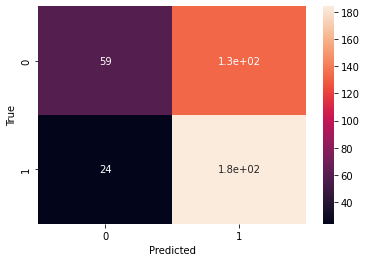

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

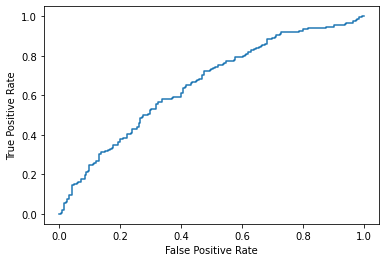

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Decision Tree 

In [ ]:
dt_classifier=DecisionTreeClassifier(random_state=53)
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,dt_classifier)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.46      0.52      0.49       192
           2       0.50      0.45      0.47       208

    accuracy                           0.48       400
   macro avg       0.48      0.48      0.48       400
weighted avg       0.48      0.48      0.48       400

Accuracy: 0.48
ROC_AUC Score:0.47273137019230765
[[ 99  93]
 [115  93]]


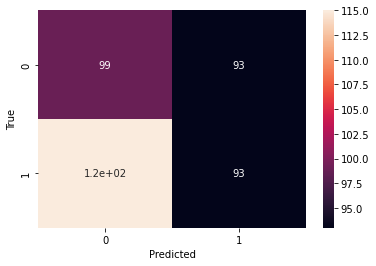

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

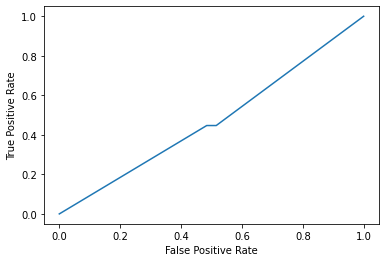

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Adaboost Classifier

In [ ]:
ada_classifier=AdaBoostClassifier(random_state=53)
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,ada_classifier)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.60      0.48      0.53       192
           2       0.59      0.70      0.64       208

    accuracy                           0.59       400
   macro avg       0.60      0.59      0.59       400
weighted avg       0.60      0.59      0.59       400

Accuracy: 0.595
ROC_AUC Score:0.6129932892628205
[[ 93  99]
 [ 63 145]]


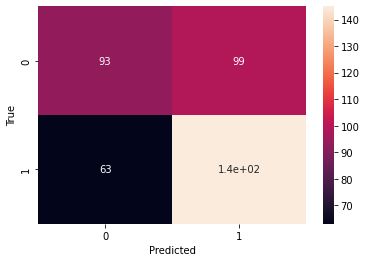

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

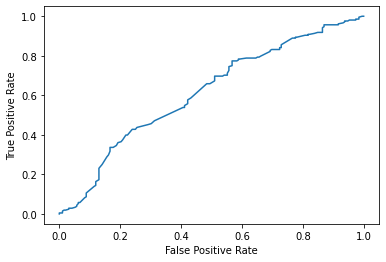

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### SVM

In [ ]:
svm_classifier=SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred=svm_classifier.predict(X_val)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
# print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.59      0.59      0.59       192
           2       0.62      0.62      0.62       208

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400

Accuracy: 0.6075
[[114  78]
 [ 79 129]]


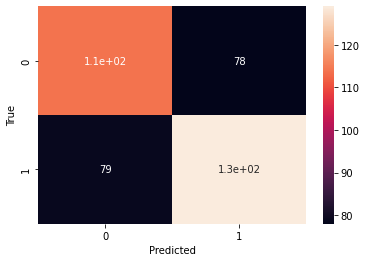

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

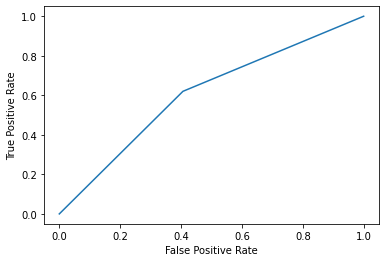

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### PCA

#### Logistic Regression

In [ ]:
log_classifier=LogisticRegression()
y_pred_prob,y_pred=pca_model_fit(X_train,y_train,X_val,log_classifier)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.59      0.58      0.59       192
           2       0.62      0.63      0.63       208

    accuracy                           0.61       400
   macro avg       0.61      0.61      0.61       400
weighted avg       0.61      0.61      0.61       400

Validation Accuracy: 0.6075
ROC_AUC Score:0.6585536858974359
[[112  80]
 [ 77 131]]


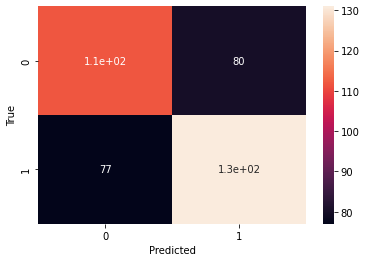

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

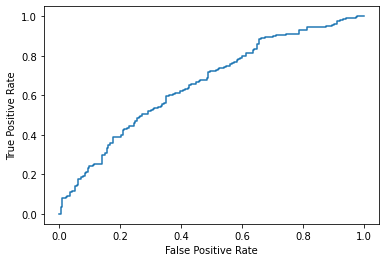

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Random Forest Classifier

In [ ]:
rf_classifier=RandomForestClassifier(random_state=53)
y_pred_prob, y_pred=pca_model_fit(X_train,y_train,X_val,rf_classifier)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.51      0.49      0.50       192
           2       0.54      0.56      0.55       208

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400

Validation Accuracy: 0.5275
ROC_AUC Score:0.5386743790064102
[[ 94  98]
 [ 91 117]]


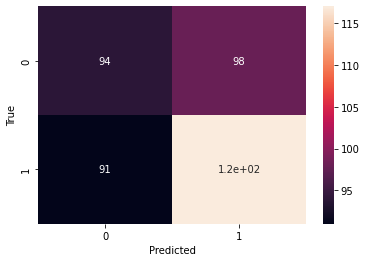

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

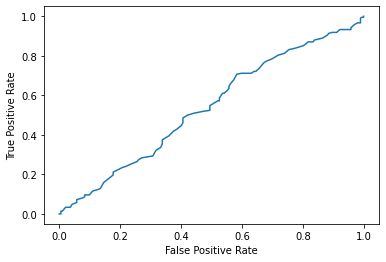

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### KNN Classifier

In [ ]:
knn_classifier=KNeighborsClassifier()
y_pred_prob,y_pred=pca_model_fit(X_train,y_train,X_val,knn_classifier)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.50      0.49      0.50       192
           2       0.54      0.54      0.54       208

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.52       400
weighted avg       0.52      0.52      0.52       400

Validation Accuracy: 0.5175
ROC_AUC Score:0.5390124198717948
[[ 95  97]
 [ 96 112]]


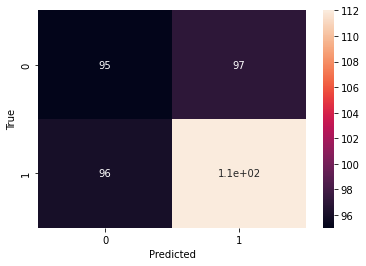

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

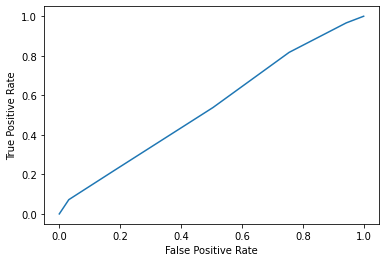

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Gaussian NB

In [ ]:
gnb_classifier=GaussianNB()
y_pred_prob, y_pred=pca_model_fit(X_train,y_train,X_val,gnb_classifier)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.64      0.41      0.50       192
           2       0.59      0.79      0.68       208

    accuracy                           0.61       400
   macro avg       0.62      0.60      0.59       400
weighted avg       0.62      0.61      0.59       400

Accuracy: 0.6075
ROC_AUC Score:0.6263271233974359
[[ 78 114]
 [ 43 165]]


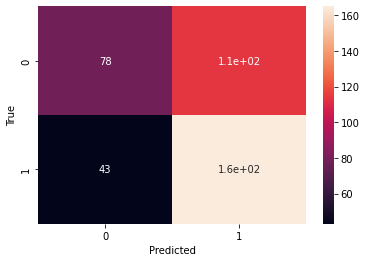

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

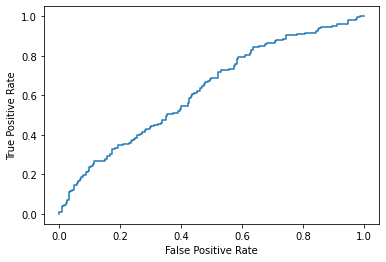

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Decision Tree 

In [ ]:
dt_classifier=DecisionTreeClassifier(random_state=53)
y_pred_prob, y_pred=pca_model_fit(X_train,y_train,X_val,dt_classifier)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.48      0.54      0.51       192
           2       0.52      0.46      0.49       208

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400

Accuracy: 0.5
ROC_AUC Score:0.49318910256410264
[[104  88]
 [112  96]]


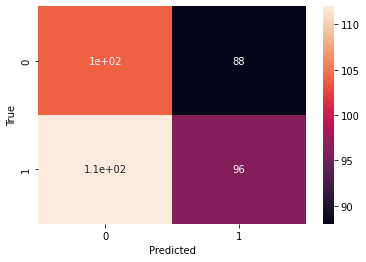

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

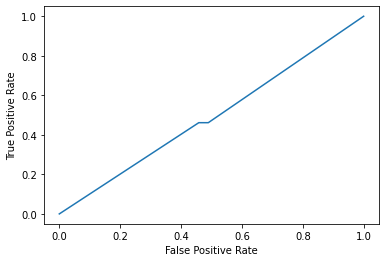

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Adaboost Classifier

In [ ]:
ada_classifier=AdaBoostClassifier(random_state=53)
y_pred_prob, y_pred=pca_model_fit(X_train,y_train,X_val,ada_classifier)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

              precision    recall  f1-score   support

           1       0.58      0.54      0.56       192
           2       0.60      0.63      0.62       208

    accuracy                           0.59       400
   macro avg       0.59      0.59      0.59       400
weighted avg       0.59      0.59      0.59       400

Accuracy: 0.5875
ROC_AUC Score:0.6060822315705129
[[103  89]
 [ 76 132]]


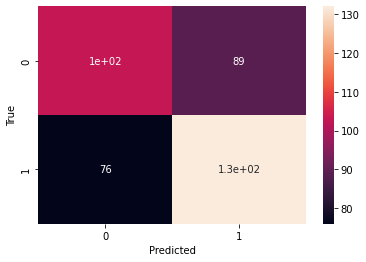

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

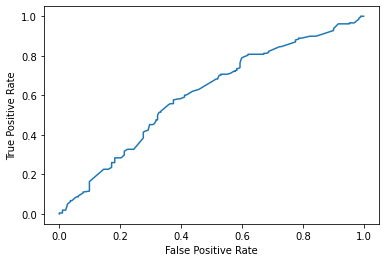

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Parameter Tuning

#### Logistic Regression

In [ ]:
parameters = {
    'penalty': ['l2','none'],
    'solver': ['newton-cg','lbfgs','sag','saga'],
    
}

log_classifier=LogisticRegression()
log_clf = RandomizedSearchCV(log_classifier, parameters, n_iter=100,cv=10,verbose=2)
y_pred_prob,y_pred=model_fit(X_train,y_train,X_val,log_clf)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......................penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...........................penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...........................penalty=l2, 

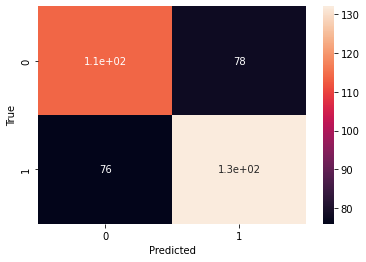

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

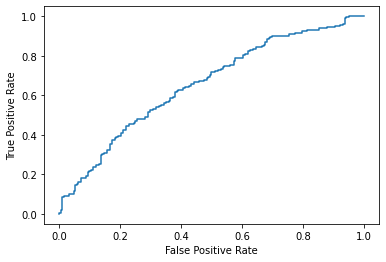

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Random Forest Classifier

In [ ]:
parameters = {
    'n_estimators': [30,50,100,150],
    'max_depth': [1,2,3],
    'max_features':[1,2,3],
    'bootstrap':[True],
    
}

rf_classifier=RandomForestClassifier(random_state=53)
rf_clf = RandomizedSearchCV(rf_classifier, parameters, cv=5,verbose=2)
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,rf_clf)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=3, max_features=3, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=3, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=3, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=3, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth=3, max_features=3, n_estimators=150; total time=   0.4s
[CV] END bootstrap=True, max_depth

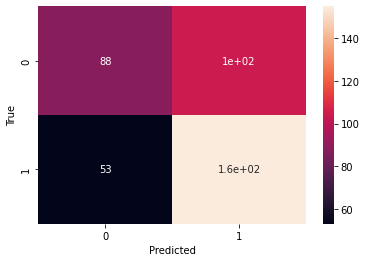

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

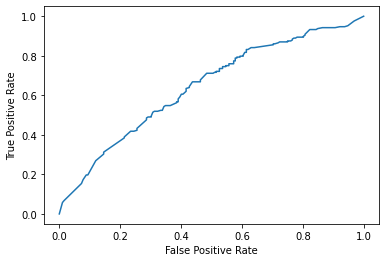

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


PCA + Parameter Tuning

In [ ]:
parameters = {
    'n_estimators': [30,50,100,150],
    'max_depth': [1,2,3],
    'max_features':[1,2,3],
    'bootstrap':[True],
    
}

rf_classifier=RandomForestClassifier(random_state=53)
rf_clf = RandomizedSearchCV(rf_classifier, parameters,n_iter=100, cv=5,verbose=2)
y_pred_prob, y_pred=pca_model_fit(X_train,y_train,X_val,rf_clf)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 36 is smaller than n_iter=100. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=30; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, max_features=1, n_estimators=50; total time=   0.1s
[CV] END bootstrap=True, max_depth=1, 

#### KNN Classifier

In [ ]:
parameters = {
      'n_neighbors': np.arange(3,50)
}

knn_classifier=KNeighborsClassifier()
knn_clf = RandomizedSearchCV(knn_classifier, parameters,n_iter=100, cv=5,verbose=2)
y_pred_prob,y_pred=model_fit(X_train,y_train,X_val,knn_clf)
print(classification_report(y_val, y_pred))
print(f"Validation Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 47 is smaller than n_iter=100. Running 47 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 47 candidates, totalling 235 fits
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=4; total time=   0.0s
[CV] END ......................................n_neighbors=5; total time=   0.0s
[CV] END ......................................

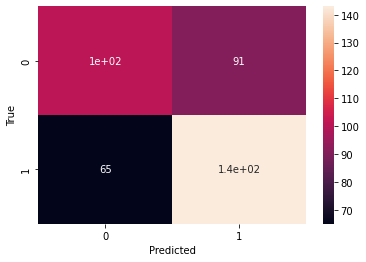

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

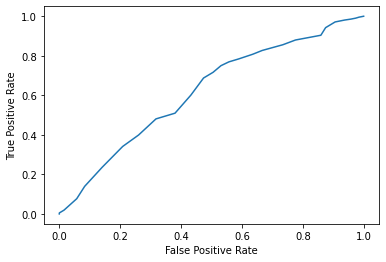

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Gaussian NB

In [ ]:
parameters = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

gnb_classifier=GaussianNB()
gnb_clf = RandomizedSearchCV(gnb_classifier, parameters,n_iter=100, cv=5,verbose=2)
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,gnb_clf)

print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.6

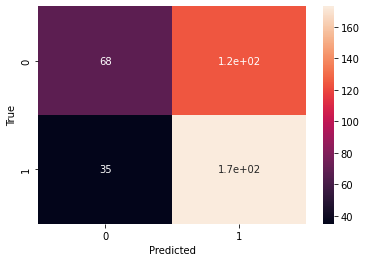

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

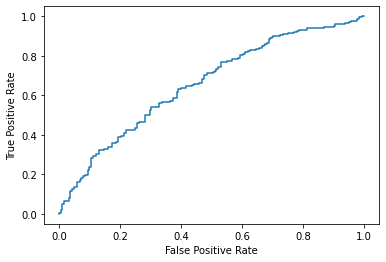

In [ ]:
fpr, tpr, _ = roc_curve(y_val,  y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Adaboost Classifier

In [ ]:
parameters= {
    'n_estimators': [100, 200, 300, 1000],
    'learning_rate' : [0.001, 0.01,0.1,0.2,0.5],
}
ada_classifier=AdaBoostClassifier(random_state=53)
ada_clf = RandomizedSearchCV(ada_classifier, parameters,n_iter=100, cv=5,verbose=2)
y_pred_prob, y_pred=model_fit(X_train,y_train,X_val,ada_clf)
print(classification_report(y_val, y_pred))
print(f"Accuracy: {accuracy_score(y_val,y_pred)}")
print(f'ROC_AUC Score:{roc_auc_score(y_val,y_pred_prob)}')
cf_matrix=confusion_matrix(y_val, y_pred)
print(cf_matrix)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 20 is smaller than n_iter=100. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.4s
[CV] END ..............learning_rate=0.001, n_estimators=100; total time=   0.3s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.5s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.6s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.6s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.6s
[CV] END ..............learning_rate=0.001, n_estimators=200; total time=   0.6s
[CV] END ..............learning_rate=0.001, n_estimators=300; total time=   0.9s
[CV] END ..............learning_rate=0.001, n_e

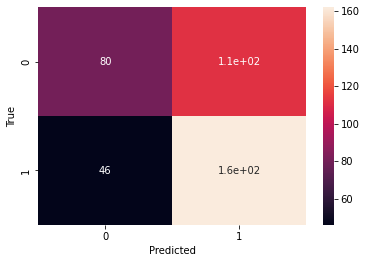

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

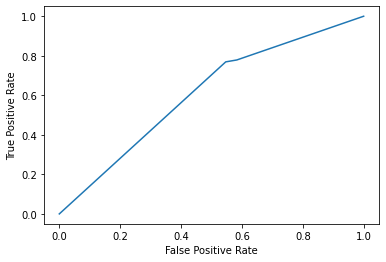

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred_prob, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### SVM

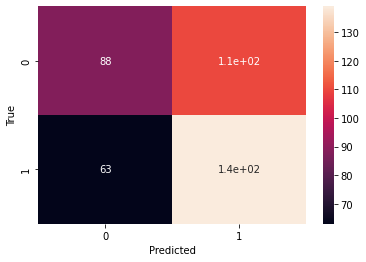

In [ ]:
sns.heatmap(cf_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

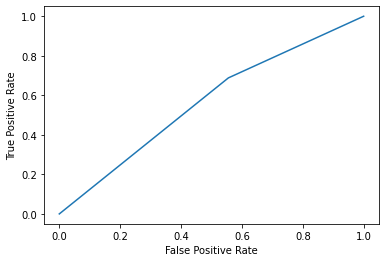

In [ ]:
fpr, tpr, _ = roc_curve(y_val, y_pred, pos_label=2)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


#### Extra 

In [ ]:
# peak_pupil=[]
# from scipy.signal import find_peaks
# empty=[]
# for i in range(len(trial_time_df)):
#   idxs, peaks=find_peaks(trial_time_df.loc[i][:], height=0)
#   # print(idxs,peaks)
#   if len(peaks['peak_heights'])==0:
#     empty.append(i)
# print(f'Empty:{len(empty)}/2000')
# print(empty)
  
#   # peak_pup=max(peaks['peak_heights'])
#   # peak_idx=np.where(peaks['peak_heights']==peak_pup)
#   # latency_time_idx=idxs[peak_idx]
#   # lat_tim=latency_time_idx*4
#   # print(latency_time_idx,lat_tim,peak_pup)
  

In [ ]:
# idxs, peaks=find_peaks(trial_time_df.loc[15][:], height=0)
# print(idxs, peaks)

In [ ]:
# plt.plot(trial_time_df.loc[15][:])
# plt.xlabel('Time')
# plt.ylabel('Pupil diameter')